In [1]:
from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Slerp
import cv2

def calucate_values(target_u, target_v, start_u, start_v, start_u_vel, start_v_vel, start_depth, start_rotation,
                   goal_u, goal_v, goal_u_vel, goal_v_vel, goal_depth, goal_rotation, debug=False):    
    # given
    start_uv_velocity = np.array([start_u_vel, start_v_vel])
    start_uvz_pos = np.array([start_u, start_v, start_depth])
    start_angle_matrix = start_rotation

    goal_uv_velocity = np.array([goal_u_vel, goal_v_vel])
    goal_uvz_pos = np.array([goal_u, goal_v, goal_depth])
    goal_angle_matrix = goal_rotation

    target_uv = np.array([target_u, target_v])
    
    # calculate
    sg_uv_vec = goal_uvz_pos[:2] - start_uvz_pos[:2]
    norm_sg_uv_vec = np.linalg.norm(sg_uv_vec, ord=2)
    st_uv_vec = target_uv - start_uvz_pos[:2]
    if norm_sg_uv_vec == 0:
        ratio = 1
    else:
        norm_sh_uv_vec = np.dot(sg_uv_vec / norm_sg_uv_vec, st_uv_vec)
        ratio = (norm_sh_uv_vec / norm_sg_uv_vec)
    
    sh_uv_vec = sg_uv_vec * ratio
    uv_velocity_h = (start_uv_velocity * (1 - ratio)) + (goal_uv_velocity * ratio)
    uv_velocity_t = uv_velocity_h + (sh_uv_vec - st_uv_vec)
    depth_t = (start_uvz_pos[2] * (1 - ratio)) + (goal_uvz_pos[2] * ratio)

    if 0 <= ratio <= 1.0:
#         print("correct ratio")
        angle_transition = np.concatenate([start_angle_matrix[np.newaxis,:,:], goal_angle_matrix[np.newaxis,:,:]], 0)
        angle_transition = R.from_matrix(angle_transition)
        slerp = Slerp([0,1], angle_transition)
        target_angle = slerp(ratio)
    else:
#         print("over ratio")
        start_angle = R.from_matrix(start_angle_matrix)
        start_angle_rotvec = start_angle.as_rotvec()
#         print(start_angle_rotvec)

        goal_angle = R.from_matrix(goal_angle_matrix)
        goal_angle_rotvec = goal_angle.as_rotvec()
#         print(goal_angle_rotvec)

        goal_angle_rotvec = np.where(goal_angle_rotvec < 0, 2 * np.pi + goal_angle_rotvec, goal_angle_rotvec)
#         print(goal_angle_rotvec)

        angle_diff = (goal_angle_rotvec - start_angle_rotvec)
#         print(angle_diff)

        half_angle_diff = np.where(angle_diff > np.pi, (angle_diff - (2 * np.pi)) * ratio, angle_diff * ratio)
#         print(half_angle_diff)

        target_angle_rotvec = start_angle_rotvec + half_angle_diff
        target_angle = R.from_rotvec(target_angle_rotvec)
#         print(target_angle.as_euler('zyx',degrees=True))
    
    if debug:
        print("sg_uv_vec")
        print(sg_uv_vec)
        print("sg_uv_vec norm")
        print(norm_sg_uv_vec)
        print("st_uv_vec")
        print(st_uv_vec)
        print("norm_sh_uv_vec")
        print(norm_sh_uv_vec)
        print("ratio")
        print(ratio)
        print("sh_uv_vec")
        print(sh_uv_vec)
        print("uv velocity at h")
        print(uv_velocity_h)
        print("uv velocity at t")
        print(uv_velocity_t)
        print("depth at t")
        print(depth_t)
        print("start angle")
        print(R.from_matrix(start_angle_matrix).as_euler('zyx',degrees=True))
        print("goal angle")
        print(R.from_matrix(goal_angle_matrix).as_euler('zyx',degrees=True))
        print("target angle")
        print(target_angle.as_euler('zyx',degrees=True))
        
    return uv_velocity_t, depth_t, target_angle.as_matrix(), target_angle.as_euler('zyx',degrees=True), True

def make_vel_image(vel_map):
    mag, ang = cv2.cartToPolar(vel_map[0], vel_map[1])
    hsv = np.zeros((256,256,3))
    hsv[...,1] = 255
    hsv[:,:,0] = ang*180/np.pi/2
    hsv[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
    rgb = cv2.cvtColor(hsv.astype('uint8'),cv2.COLOR_HSV2RGB)
    return Image.fromarray(rgb)

def make_depth_image(depth_map):
    minimum_value = np.unique(depth_map)[1]
    normalized_depth = np.where(depth_map != 0, depth_map - minimum_value, 0)
    normalized_depth = cv2.normalize(normalized_depth,None,0,255,cv2.NORM_MINMAX)
    return Image.fromarray(normalized_depth.astype('uint8'))

def make_rotation_image(eular_map):
    eular_map = np.where(eular_map < 0, abs(eular_map), eular_map)
    eular_map = eular_map / 180 * 255
    return Image.fromarray(eular_map.astype('uint8'))

# make trajectory image

  0%|          | 0/50 [00:00<?, ?it/s]

task:StackWine  data:00001
1/172


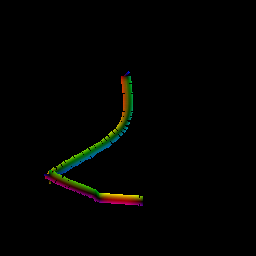

  2%|▏         | 1/50 [00:03<03:00,  3.68s/it]

task:StackWine  data:00002
1/169


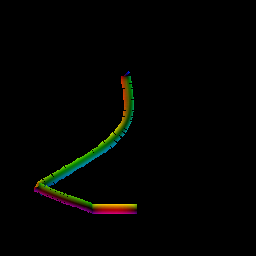

  4%|▍         | 2/50 [00:07<02:58,  3.72s/it]

task:StackWine  data:00003
1/179


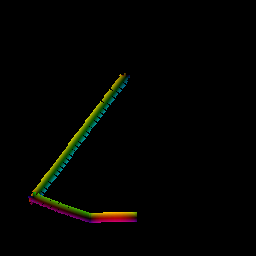

  6%|▌         | 3/50 [00:11<02:56,  3.75s/it]

task:StackWine  data:00004
1/181


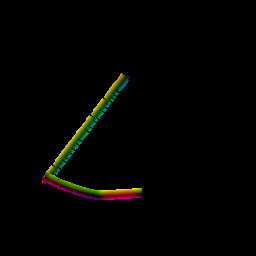

  8%|▊         | 4/50 [00:14<02:47,  3.64s/it]

task:StackWine  data:00005
1/143


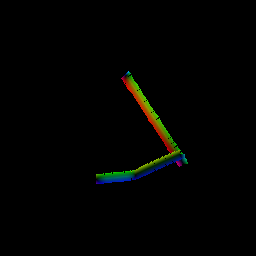

 10%|█         | 5/50 [00:17<02:35,  3.47s/it]

task:StackWine  data:00006
1/181


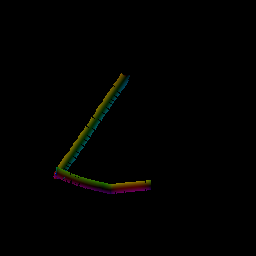

 12%|█▏        | 6/50 [00:21<02:33,  3.49s/it]

task:StackWine  data:00007
1/140


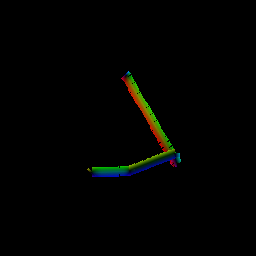

 14%|█▍        | 7/50 [00:24<02:25,  3.39s/it]

task:StackWine  data:00008
1/178


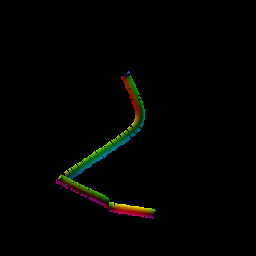

 16%|█▌        | 8/50 [00:28<02:24,  3.44s/it]

task:StackWine  data:00009
1/177


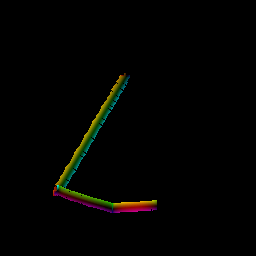

 18%|█▊        | 9/50 [00:31<02:21,  3.44s/it]

task:StackWine  data:00010
1/182


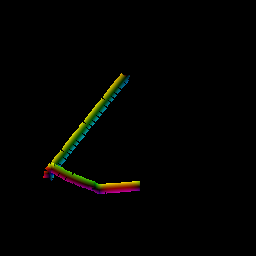

 20%|██        | 10/50 [00:34<02:18,  3.47s/it]

task:StackWine  data:00011
1/173


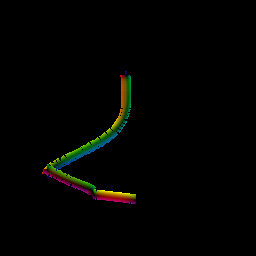

 22%|██▏       | 11/50 [00:38<02:17,  3.53s/it]

task:StackWine  data:00012
1/174


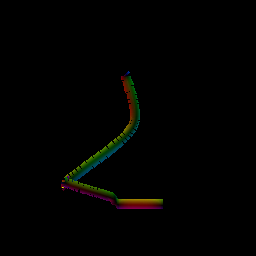

 24%|██▍       | 12/50 [00:42<02:18,  3.64s/it]

task:StackWine  data:00013
1/183


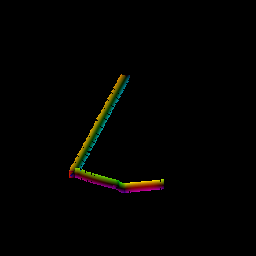

 26%|██▌       | 13/50 [00:45<02:11,  3.55s/it]

task:StackWine  data:00014
1/175


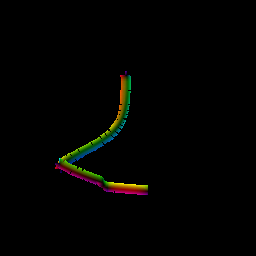

 28%|██▊       | 14/50 [00:49<02:07,  3.53s/it]

task:StackWine  data:00015
1/169


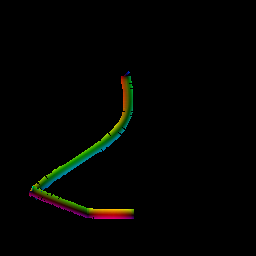

 30%|███       | 15/50 [00:53<02:05,  3.59s/it]

task:StackWine  data:00016
1/180


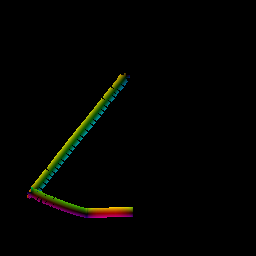

 32%|███▏      | 16/50 [00:57<02:07,  3.75s/it]

task:StackWine  data:00017
1/180


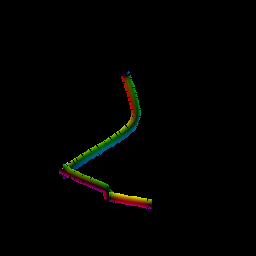

 34%|███▍      | 17/50 [01:01<02:09,  3.93s/it]

task:StackWine  data:00018
1/174


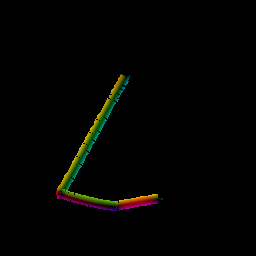

 36%|███▌      | 18/50 [01:05<02:02,  3.84s/it]

task:StackWine  data:00019
1/176


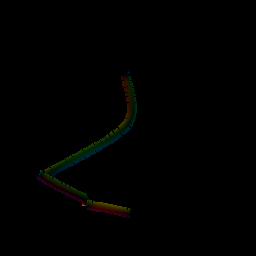

 38%|███▊      | 19/50 [01:08<01:57,  3.79s/it]

task:StackWine  data:00020
1/158


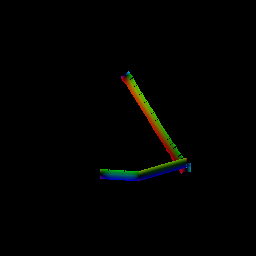

 40%|████      | 20/50 [01:11<01:47,  3.59s/it]

task:StackWine  data:00021
1/179


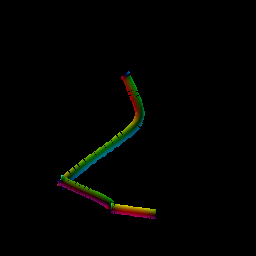

 42%|████▏     | 21/50 [01:15<01:45,  3.62s/it]

task:StackWine  data:00022
1/172


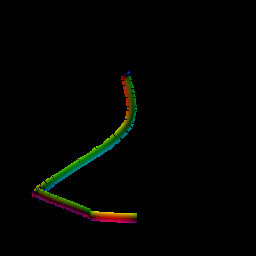

 44%|████▍     | 22/50 [01:19<01:43,  3.69s/it]

task:StackWine  data:00023
1/177


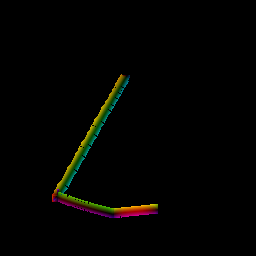

 46%|████▌     | 23/50 [01:23<01:39,  3.67s/it]

task:StackWine  data:00024
1/175


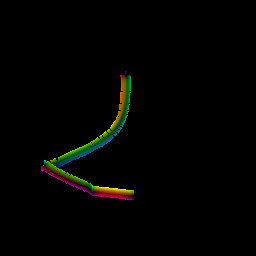

 48%|████▊     | 24/50 [01:26<01:33,  3.59s/it]

task:StackWine  data:00025
1/175


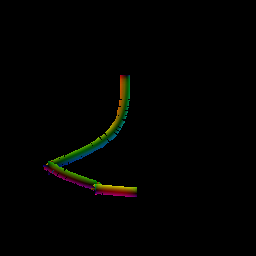

 50%|█████     | 25/50 [01:29<01:28,  3.53s/it]

task:StackWine  data:00026
1/182


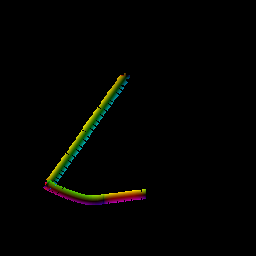

 52%|█████▏    | 26/50 [01:33<01:25,  3.58s/it]

task:StackWine  data:00027
1/184


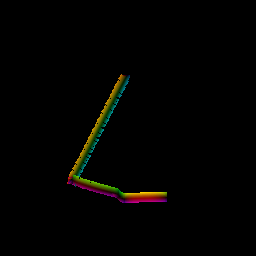

 54%|█████▍    | 27/50 [01:37<01:21,  3.54s/it]

task:StackWine  data:00028
1/176


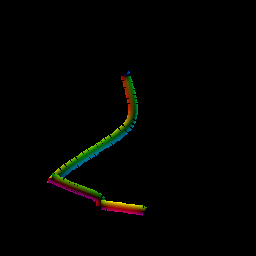

 56%|█████▌    | 28/50 [01:40<01:17,  3.51s/it]

task:StackWine  data:00029
1/190


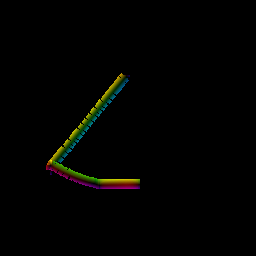

 58%|█████▊    | 29/50 [01:45<01:19,  3.80s/it]

task:StackWine  data:00030
1/173


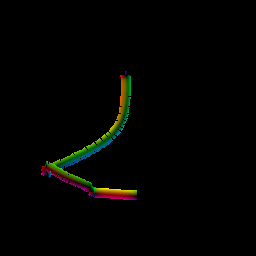

 60%|██████    | 30/50 [01:48<01:15,  3.77s/it]

task:StackWine  data:00031
1/182


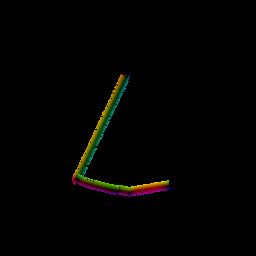

 62%|██████▏   | 31/50 [01:52<01:11,  3.75s/it]

task:StackWine  data:00032
1/179


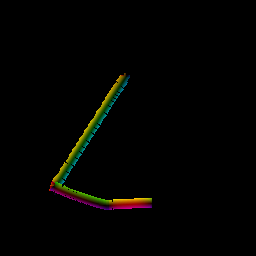

 64%|██████▍   | 32/50 [01:55<01:05,  3.63s/it]

task:StackWine  data:00033
1/177


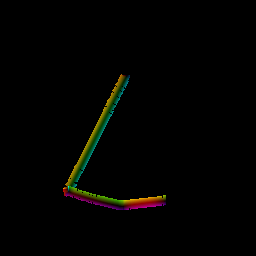

 66%|██████▌   | 33/50 [01:59<01:00,  3.54s/it]

task:StackWine  data:00034
1/175


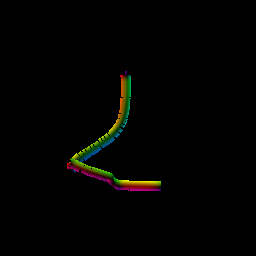

 68%|██████▊   | 34/50 [02:02<00:58,  3.64s/it]

task:StackWine  data:00035
1/180


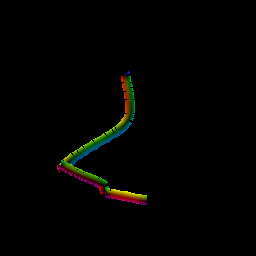

 70%|███████   | 35/50 [02:06<00:52,  3.52s/it]

task:StackWine  data:00036
1/175


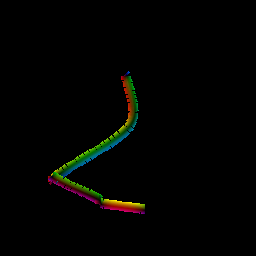

 72%|███████▏  | 36/50 [02:09<00:48,  3.47s/it]

task:StackWine  data:00037
1/178


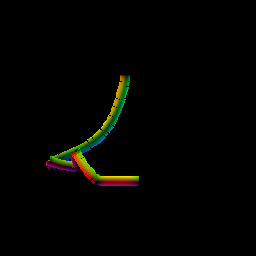

 74%|███████▍  | 37/50 [02:12<00:44,  3.44s/it]

task:StackWine  data:00038
1/173


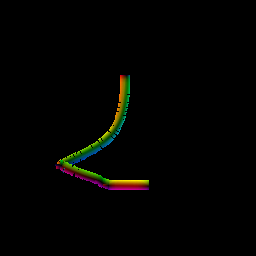

 76%|███████▌  | 38/50 [02:16<00:40,  3.35s/it]

task:StackWine  data:00039
1/174


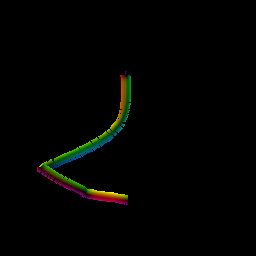

 78%|███████▊  | 39/50 [02:19<00:37,  3.36s/it]

task:StackWine  data:00040
1/179


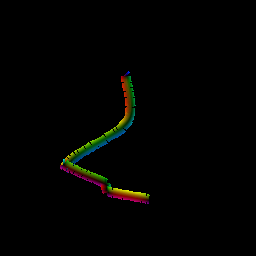

 80%|████████  | 40/50 [02:22<00:33,  3.35s/it]

task:StackWine  data:00041
1/173


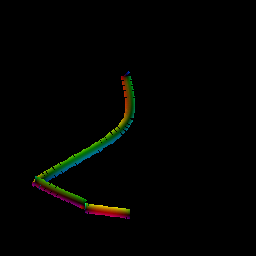

 82%|████████▏ | 41/50 [02:26<00:31,  3.46s/it]

task:StackWine  data:00042
1/142


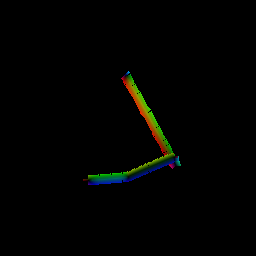

 84%|████████▍ | 42/50 [02:29<00:26,  3.26s/it]

task:StackWine  data:00043
1/141


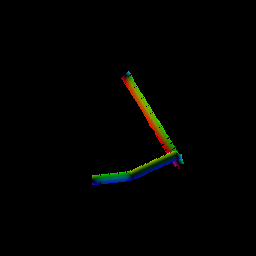

 86%|████████▌ | 43/50 [02:32<00:21,  3.14s/it]

task:StackWine  data:00044
1/180


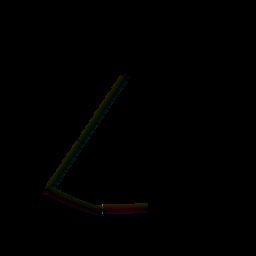

 88%|████████▊ | 44/50 [02:35<00:19,  3.21s/it]

task:StackWine  data:00045
1/177


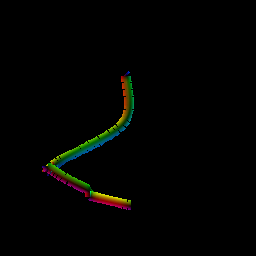

 90%|█████████ | 45/50 [02:39<00:16,  3.31s/it]

task:StackWine  data:00046
1/167


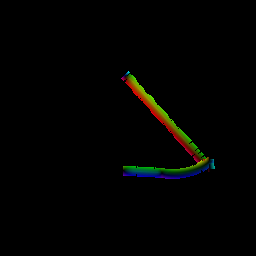

 92%|█████████▏| 46/50 [02:42<00:13,  3.34s/it]

task:StackWine  data:00047
1/180


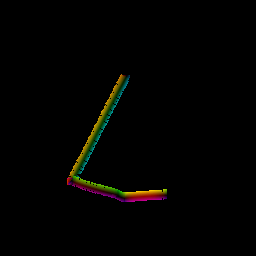

 94%|█████████▍| 47/50 [02:46<00:10,  3.57s/it]

task:StackWine  data:00048
1/170


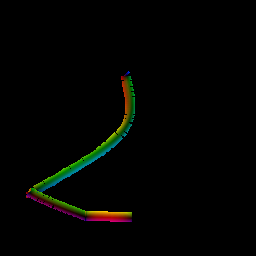

 96%|█████████▌| 48/50 [02:50<00:07,  3.59s/it]

task:StackWine  data:00049
1/177


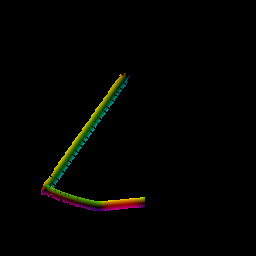

 98%|█████████▊| 49/50 [02:53<00:03,  3.60s/it]

task:StackWine  data:00000
1/177


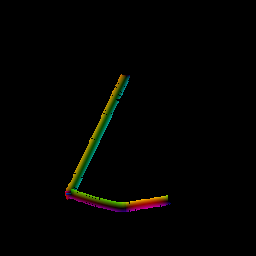

  0%|          | 0/50 [00:00<?, ?it/s]

task:PutRubbishInBin  data:00001
1/216


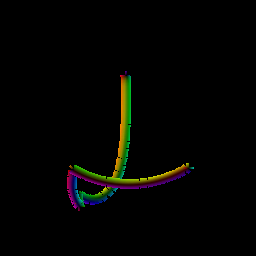

  2%|▏         | 1/50 [00:05<04:40,  5.73s/it]

task:PutRubbishInBin  data:00002
1/108


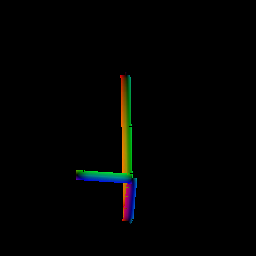

  4%|▍         | 2/50 [00:08<03:57,  4.94s/it]

task:PutRubbishInBin  data:00003
1/150


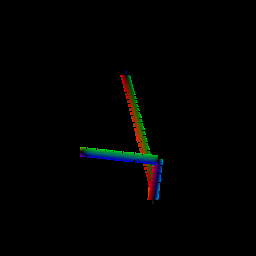

  6%|▌         | 3/50 [00:12<03:29,  4.46s/it]

task:PutRubbishInBin  data:00004
1/126


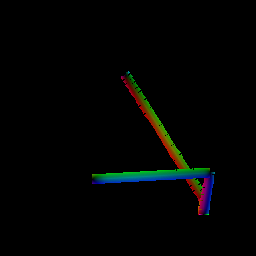

  8%|▊         | 4/50 [00:16<03:18,  4.32s/it]

task:PutRubbishInBin  data:00005
1/217


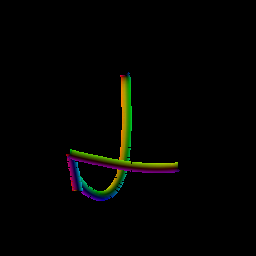

 10%|█         | 5/50 [00:21<03:21,  4.49s/it]

task:PutRubbishInBin  data:00006
1/110


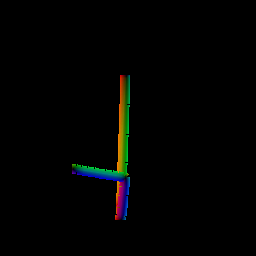

 12%|█▏        | 6/50 [00:24<02:58,  4.05s/it]

task:PutRubbishInBin  data:00007
1/139


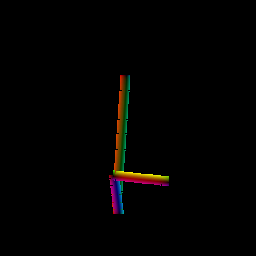

 14%|█▍        | 7/50 [00:27<02:44,  3.83s/it]

task:PutRubbishInBin  data:00008
1/139


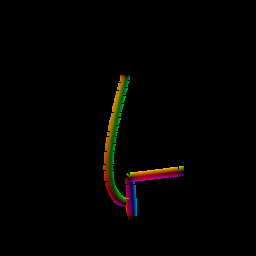

 16%|█▌        | 8/50 [00:30<02:34,  3.67s/it]

task:PutRubbishInBin  data:00009
1/230


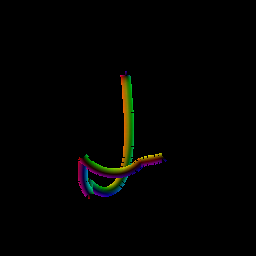

 18%|█▊        | 9/50 [00:34<02:37,  3.83s/it]

task:PutRubbishInBin  data:00010
1/111


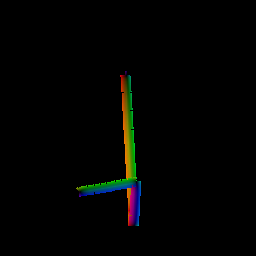

 20%|██        | 10/50 [00:38<02:25,  3.65s/it]

task:PutRubbishInBin  data:00011
1/143


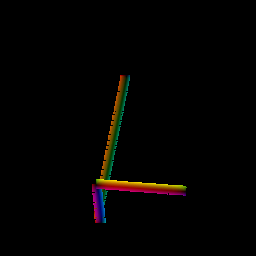

 22%|██▏       | 11/50 [00:41<02:21,  3.63s/it]

task:PutRubbishInBin  data:00012
1/148


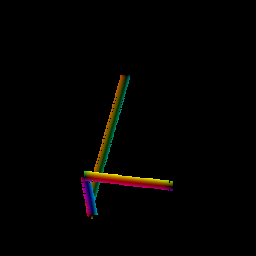

 24%|██▍       | 12/50 [00:45<02:17,  3.62s/it]

task:PutRubbishInBin  data:00013
1/109


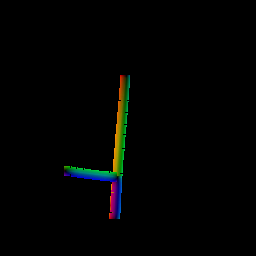

 26%|██▌       | 13/50 [00:48<02:09,  3.51s/it]

task:PutRubbishInBin  data:00014
1/151


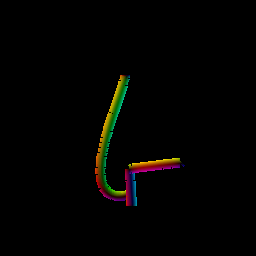

 28%|██▊       | 14/50 [00:51<02:04,  3.47s/it]

task:PutRubbishInBin  data:00015
1/214


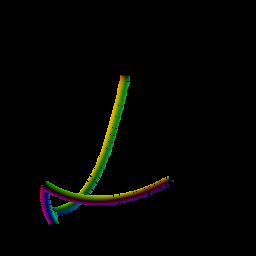

 30%|███       | 15/50 [00:56<02:12,  3.79s/it]

task:PutRubbishInBin  data:00016
1/146


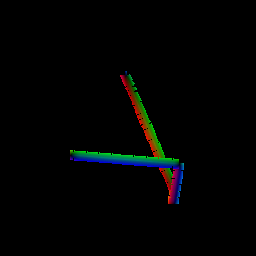

 32%|███▏      | 16/50 [01:00<02:06,  3.73s/it]

task:PutRubbishInBin  data:00017
1/146


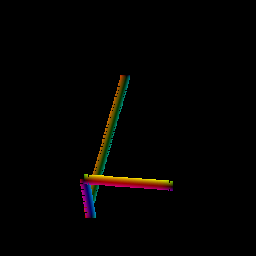

 34%|███▍      | 17/50 [01:03<02:02,  3.71s/it]

task:PutRubbishInBin  data:00018
1/152


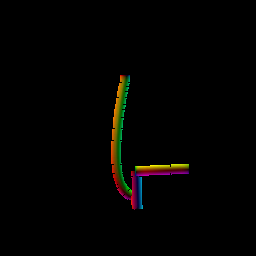

 36%|███▌      | 18/50 [01:07<02:00,  3.77s/it]

task:PutRubbishInBin  data:00019
1/105


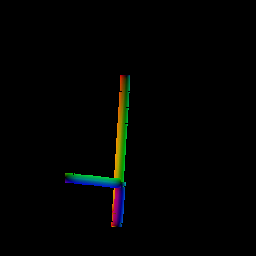

 38%|███▊      | 19/50 [01:10<01:51,  3.59s/it]

task:PutRubbishInBin  data:00020
1/239


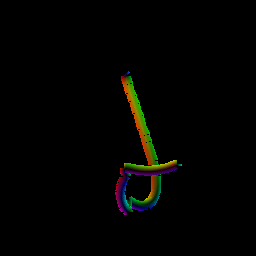

 40%|████      | 20/50 [01:14<01:51,  3.73s/it]

task:PutRubbishInBin  data:00021
1/129


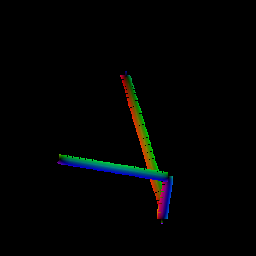

 42%|████▏     | 21/50 [01:18<01:46,  3.68s/it]

task:PutRubbishInBin  data:00022
1/212


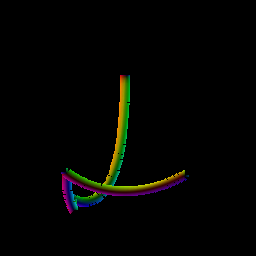

 44%|████▍     | 22/50 [01:22<01:49,  3.92s/it]

task:PutRubbishInBin  data:00023
1/142


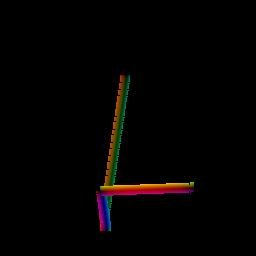

 46%|████▌     | 23/50 [01:26<01:44,  3.87s/it]

task:PutRubbishInBin  data:00024
1/119


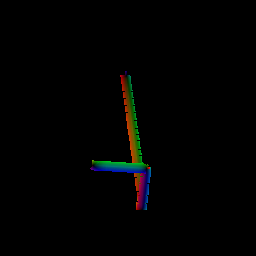

 48%|████▊     | 24/50 [01:29<01:33,  3.61s/it]

task:PutRubbishInBin  data:00025
1/203


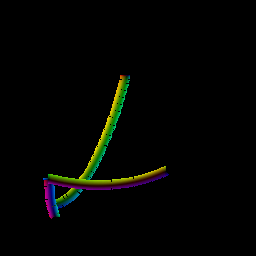

 50%|█████     | 25/50 [01:34<01:37,  3.88s/it]

task:PutRubbishInBin  data:00026
1/160


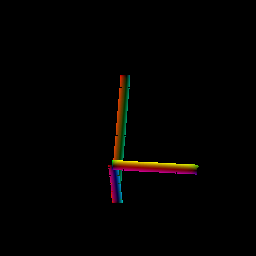

 52%|█████▏    | 26/50 [01:37<01:29,  3.74s/it]

task:PutRubbishInBin  data:00027
1/140


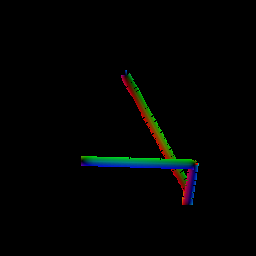

 54%|█████▍    | 27/50 [01:41<01:24,  3.68s/it]

task:PutRubbishInBin  data:00028
1/107


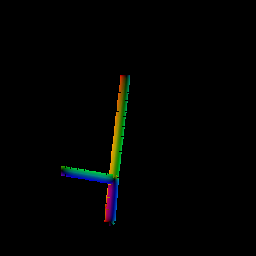

 56%|█████▌    | 28/50 [01:44<01:16,  3.49s/it]

task:PutRubbishInBin  data:00029
1/224


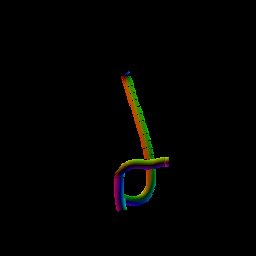

 58%|█████▊    | 29/50 [01:49<01:22,  3.94s/it]

task:PutRubbishInBin  data:00030
1/156


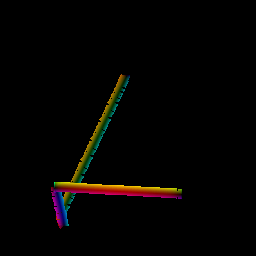

 60%|██████    | 30/50 [01:53<01:19,  3.96s/it]

task:PutRubbishInBin  data:00031
1/206


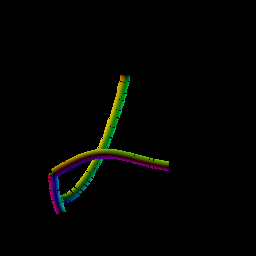

 62%|██████▏   | 31/50 [01:57<01:16,  4.03s/it]

task:PutRubbishInBin  data:00032
1/157


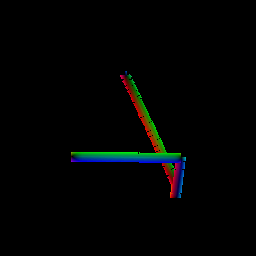

 64%|██████▍   | 32/50 [02:00<01:09,  3.87s/it]

task:PutRubbishInBin  data:00033
1/136


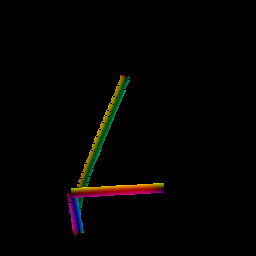

 66%|██████▌   | 33/50 [02:04<01:04,  3.78s/it]

task:PutRubbishInBin  data:00034
1/141


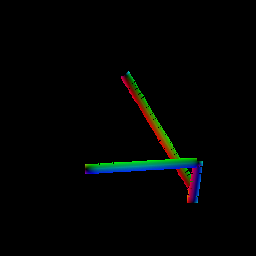

 68%|██████▊   | 34/50 [02:08<01:02,  3.88s/it]

task:PutRubbishInBin  data:00035
1/131


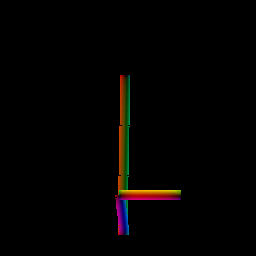

 70%|███████   | 35/50 [02:11<00:55,  3.72s/it]

task:PutRubbishInBin  data:00036
1/117


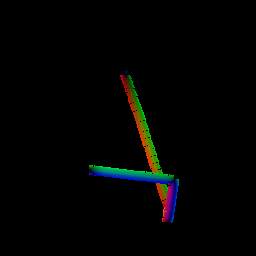

 72%|███████▏  | 36/50 [02:15<00:50,  3.61s/it]

task:PutRubbishInBin  data:00037
1/201


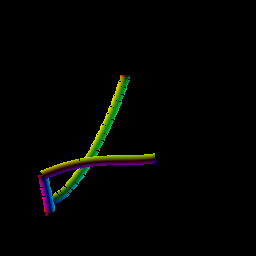

 74%|███████▍  | 37/50 [02:19<00:49,  3.84s/it]

task:PutRubbishInBin  data:00038
1/163


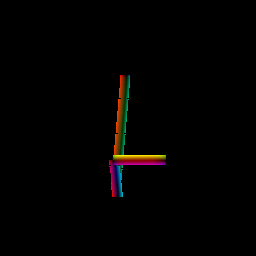

 76%|███████▌  | 38/50 [02:22<00:43,  3.65s/it]

task:PutRubbishInBin  data:00039
1/146


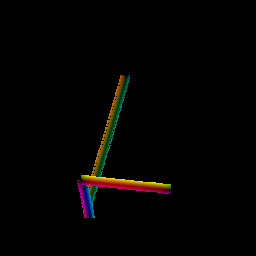

 78%|███████▊  | 39/50 [02:26<00:40,  3.67s/it]

task:PutRubbishInBin  data:00040
1/142


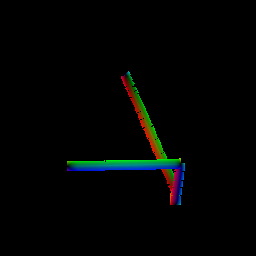

 80%|████████  | 40/50 [02:30<00:36,  3.65s/it]

task:PutRubbishInBin  data:00041
1/127


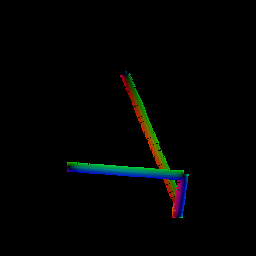

 82%|████████▏ | 41/50 [02:33<00:32,  3.61s/it]

task:PutRubbishInBin  data:00042
1/152


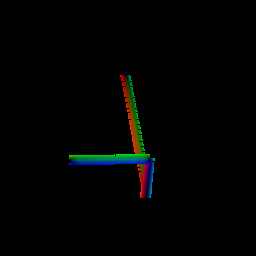

 84%|████████▍ | 42/50 [02:37<00:28,  3.56s/it]

task:PutRubbishInBin  data:00043
1/216


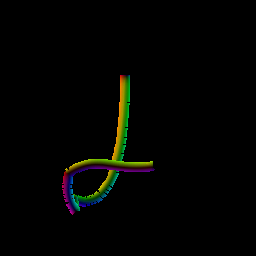

 86%|████████▌ | 43/50 [02:41<00:26,  3.73s/it]

task:PutRubbishInBin  data:00044
1/124


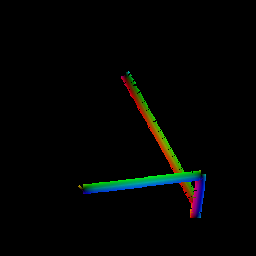

 88%|████████▊ | 44/50 [02:44<00:22,  3.67s/it]

task:PutRubbishInBin  data:00045
1/190


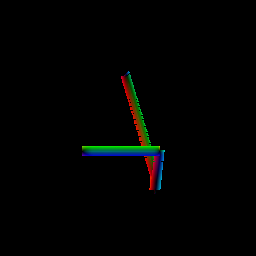

 90%|█████████ | 45/50 [02:48<00:18,  3.65s/it]

task:PutRubbishInBin  data:00046
1/234


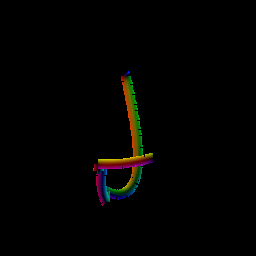

 92%|█████████▏| 46/50 [02:52<00:15,  3.83s/it]

task:PutRubbishInBin  data:00047
1/126


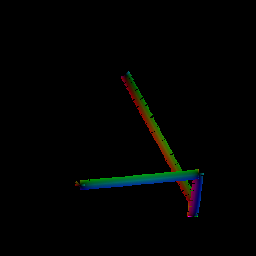

 94%|█████████▍| 47/50 [02:56<00:11,  3.77s/it]

task:PutRubbishInBin  data:00048
1/102


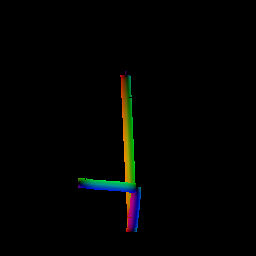

 96%|█████████▌| 48/50 [02:59<00:07,  3.60s/it]

task:PutRubbishInBin  data:00049
1/155


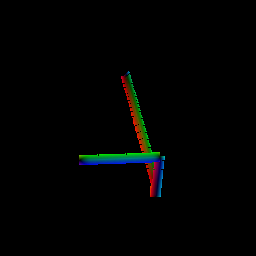

 98%|█████████▊| 49/50 [03:02<00:03,  3.50s/it]

task:PutRubbishInBin  data:00000
1/141


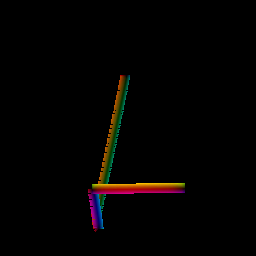

  0%|          | 0/50 [00:00<?, ?it/s]

task:PickUpCup  data:00001
1/125


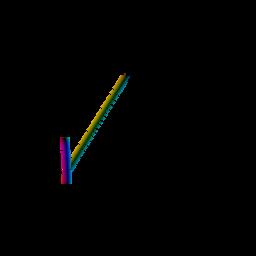

  2%|▏         | 1/50 [00:03<02:37,  3.21s/it]

task:PickUpCup  data:00002
1/111


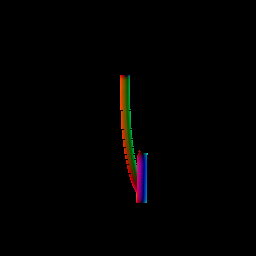

  4%|▍         | 2/50 [00:06<02:31,  3.16s/it]

task:PickUpCup  data:00003
1/75


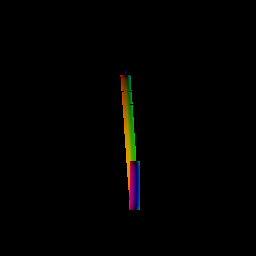

  6%|▌         | 3/50 [00:08<02:16,  2.90s/it]

task:PickUpCup  data:00004
1/79


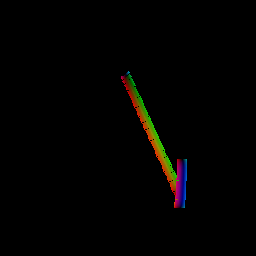

  8%|▊         | 4/50 [00:10<02:05,  2.72s/it]

task:PickUpCup  data:00005
1/74


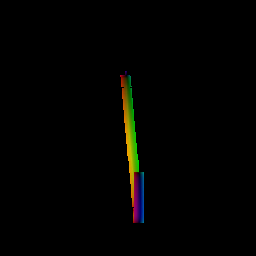

 10%|█         | 5/50 [00:13<01:57,  2.62s/it]

task:PickUpCup  data:00006
1/111


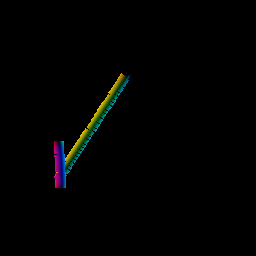

 12%|█▏        | 6/50 [00:15<01:52,  2.56s/it]

task:PickUpCup  data:00007
1/83


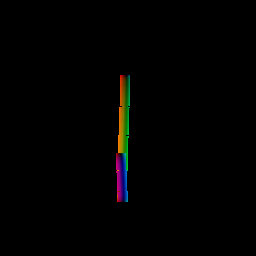

 14%|█▍        | 7/50 [00:18<01:49,  2.54s/it]

task:PickUpCup  data:00008
1/97


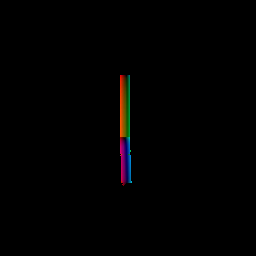

 16%|█▌        | 8/50 [00:20<01:44,  2.48s/it]

task:PickUpCup  data:00009
1/92


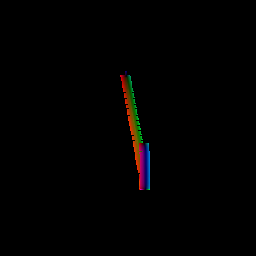

 18%|█▊        | 9/50 [00:22<01:40,  2.44s/it]

task:PickUpCup  data:00010
1/93


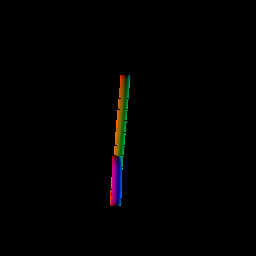

 20%|██        | 10/50 [00:25<01:40,  2.51s/it]

task:PickUpCup  data:00011
1/90


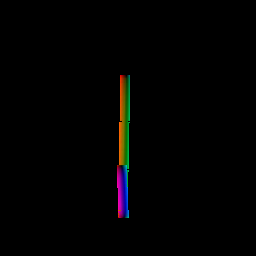

 22%|██▏       | 11/50 [00:28<01:39,  2.54s/it]

task:PickUpCup  data:00012
1/130


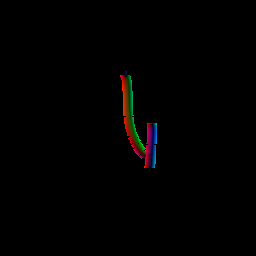

 24%|██▍       | 12/50 [00:30<01:35,  2.51s/it]

task:PickUpCup  data:00013
1/102


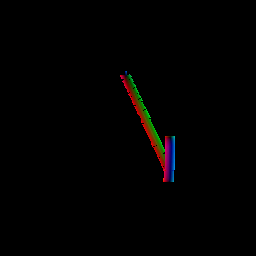

 26%|██▌       | 13/50 [00:32<01:29,  2.42s/it]

task:PickUpCup  data:00014
1/93


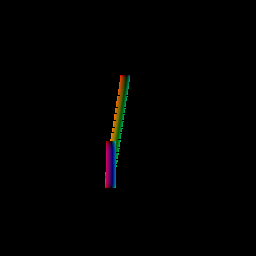

 28%|██▊       | 14/50 [00:35<01:25,  2.37s/it]

task:PickUpCup  data:00015
1/78


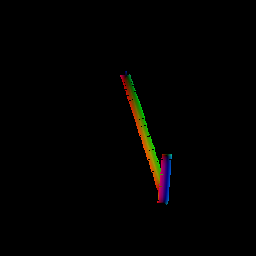

 30%|███       | 15/50 [00:37<01:21,  2.34s/it]

task:PickUpCup  data:00016
1/98


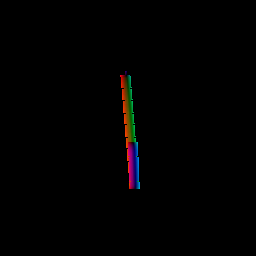

 32%|███▏      | 16/50 [00:39<01:20,  2.38s/it]

task:PickUpCup  data:00017
1/105


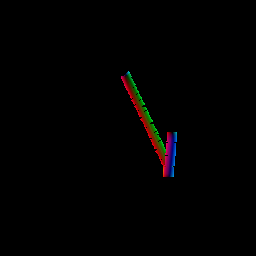

 34%|███▍      | 17/50 [00:42<01:24,  2.55s/it]

task:PickUpCup  data:00018
1/126


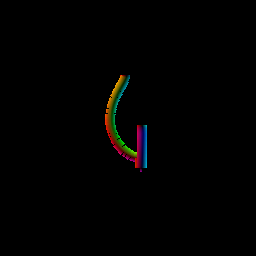

 36%|███▌      | 18/50 [00:45<01:22,  2.57s/it]

task:PickUpCup  data:00019
1/93


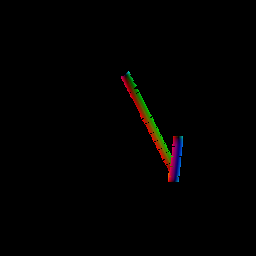

 38%|███▊      | 19/50 [00:47<01:16,  2.48s/it]

task:PickUpCup  data:00020
1/84


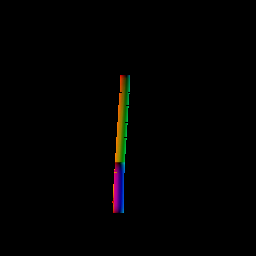

 40%|████      | 20/50 [00:50<01:15,  2.51s/it]

task:PickUpCup  data:00021
1/81


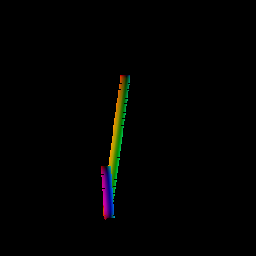

 42%|████▏     | 21/50 [00:52<01:12,  2.48s/it]

task:PickUpCup  data:00022
1/98


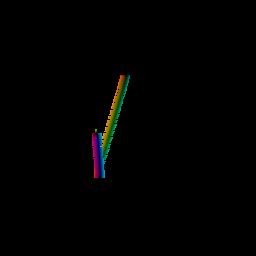

 44%|████▍     | 22/50 [00:54<01:06,  2.39s/it]

task:PickUpCup  data:00023
1/101


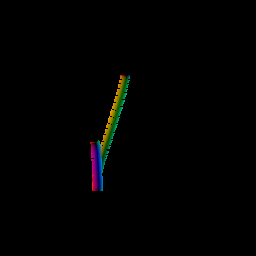

 46%|████▌     | 23/50 [00:56<01:03,  2.34s/it]

task:PickUpCup  data:00024
1/91


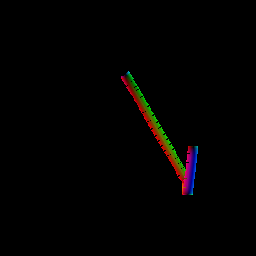

 48%|████▊     | 24/50 [00:59<01:01,  2.36s/it]

task:PickUpCup  data:00025
1/130


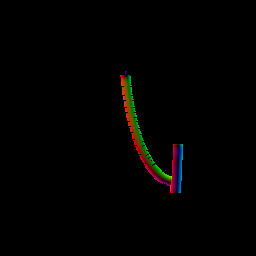

 50%|█████     | 25/50 [01:03<01:09,  2.77s/it]

task:PickUpCup  data:00026
1/119


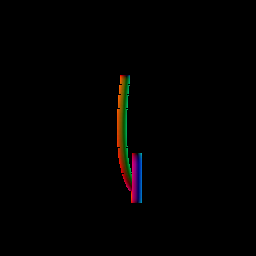

 52%|█████▏    | 26/50 [01:06<01:09,  2.88s/it]

task:PickUpCup  data:00027
1/81


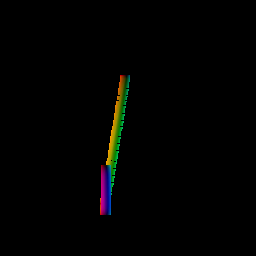

 54%|█████▍    | 27/50 [01:08<01:02,  2.72s/it]

task:PickUpCup  data:00028
1/102


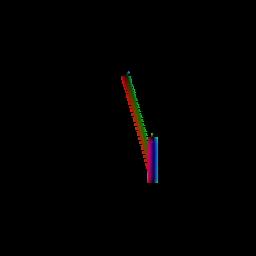

 56%|█████▌    | 28/50 [01:10<00:56,  2.59s/it]

task:PickUpCup  data:00029
1/95


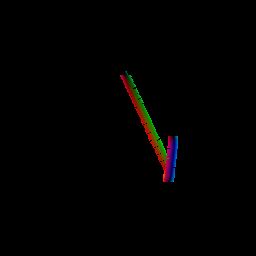

 58%|█████▊    | 29/50 [01:13<00:52,  2.50s/it]

task:PickUpCup  data:00030
1/90


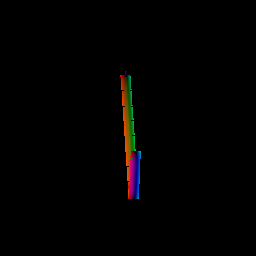

 60%|██████    | 30/50 [01:15<00:49,  2.46s/it]

task:PickUpCup  data:00031
1/85


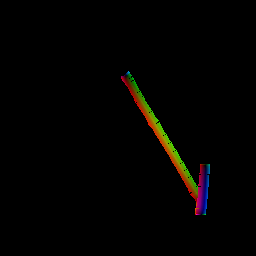

 62%|██████▏   | 31/50 [01:17<00:45,  2.41s/it]

task:PickUpCup  data:00032
1/116


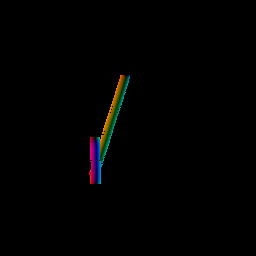

 64%|██████▍   | 32/50 [01:20<00:44,  2.45s/it]

task:PickUpCup  data:00033
1/112


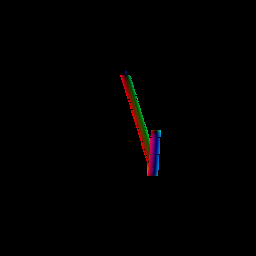

 66%|██████▌   | 33/50 [01:22<00:40,  2.41s/it]

task:PickUpCup  data:00034
1/99


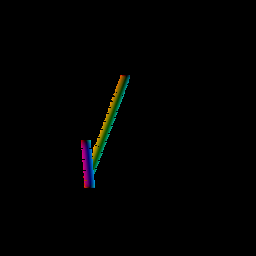

 68%|██████▊   | 34/50 [01:25<00:38,  2.39s/it]

task:PickUpCup  data:00035
1/125


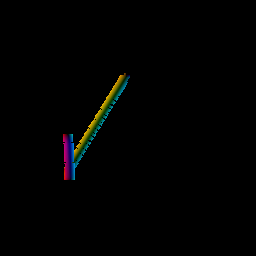

 70%|███████   | 35/50 [01:28<00:38,  2.59s/it]

task:PickUpCup  data:00036
1/93


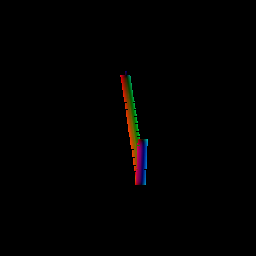

 72%|███████▏  | 36/50 [01:30<00:33,  2.42s/it]

task:PickUpCup  data:00037
1/100


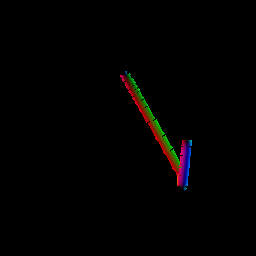

 74%|███████▍  | 37/50 [01:32<00:30,  2.36s/it]

task:PickUpCup  data:00038
1/129


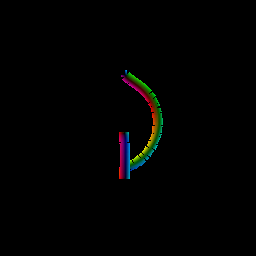

 76%|███████▌  | 38/50 [01:34<00:28,  2.39s/it]

task:PickUpCup  data:00039
1/95


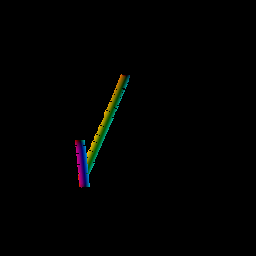

 78%|███████▊  | 39/50 [01:37<00:26,  2.36s/it]

task:PickUpCup  data:00040
1/97


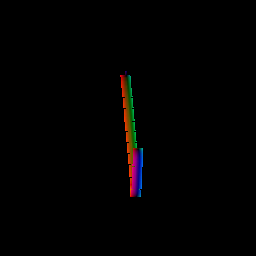

 80%|████████  | 40/50 [01:39<00:23,  2.33s/it]

task:PickUpCup  data:00041
1/93


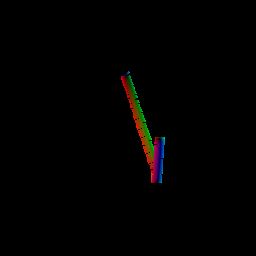

 82%|████████▏ | 41/50 [01:41<00:21,  2.34s/it]

task:PickUpCup  data:00042
1/123


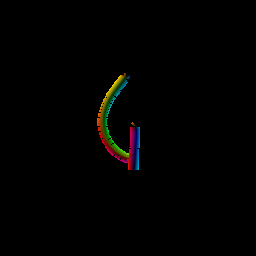

 84%|████████▍ | 42/50 [01:44<00:19,  2.39s/it]

task:PickUpCup  data:00043
1/113


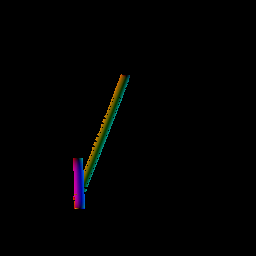

 86%|████████▌ | 43/50 [01:46<00:17,  2.49s/it]

task:PickUpCup  data:00044
1/112


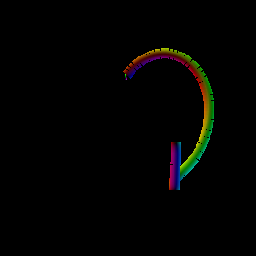

 88%|████████▊ | 44/50 [01:50<00:16,  2.68s/it]

task:PickUpCup  data:00045
1/104


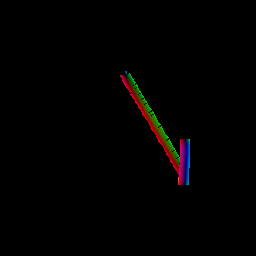

 90%|█████████ | 45/50 [01:52<00:12,  2.57s/it]

task:PickUpCup  data:00046
1/84


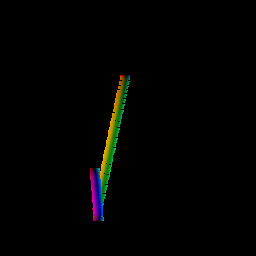

 92%|█████████▏| 46/50 [01:54<00:09,  2.50s/it]

task:PickUpCup  data:00047
1/96


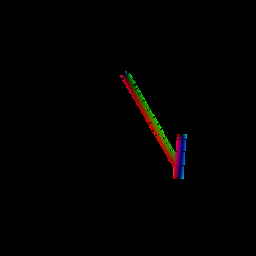

 94%|█████████▍| 47/50 [01:56<00:07,  2.40s/it]

task:PickUpCup  data:00048
1/95


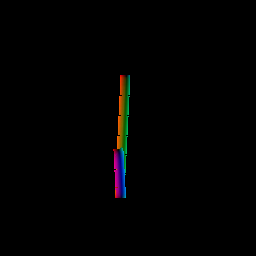

 96%|█████████▌| 48/50 [01:59<00:04,  2.39s/it]

task:PickUpCup  data:00049
1/79


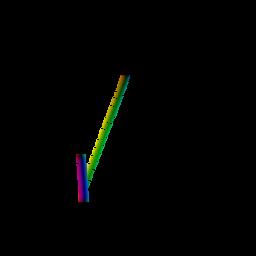

 98%|█████████▊| 49/50 [02:01<00:02,  2.35s/it]

task:PickUpCup  data:00000
1/122


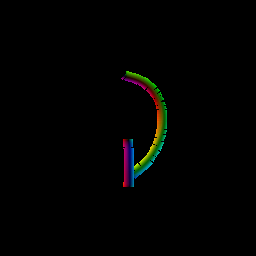

  0%|          | 0/50 [00:00<?, ?it/s]

task:PutKnifeOnChoppingBoard  data:00001
1/118


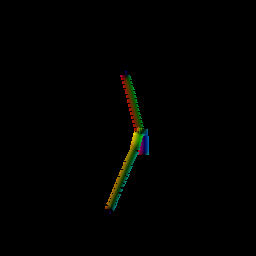

  2%|▏         | 1/50 [00:03<02:33,  3.13s/it]

task:PutKnifeOnChoppingBoard  data:00002
1/186


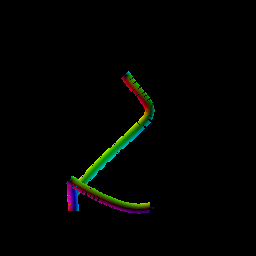

  4%|▍         | 2/50 [00:06<02:37,  3.29s/it]

task:PutKnifeOnChoppingBoard  data:00003
1/165


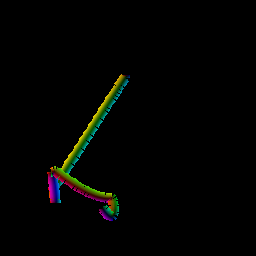

  6%|▌         | 3/50 [00:10<02:36,  3.34s/it]

task:PutKnifeOnChoppingBoard  data:00004
1/192


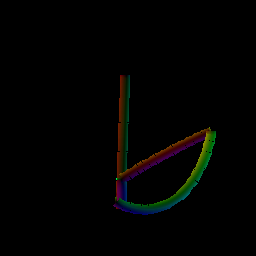

  8%|▊         | 4/50 [00:15<02:54,  3.79s/it]

task:PutKnifeOnChoppingBoard  data:00005
1/176


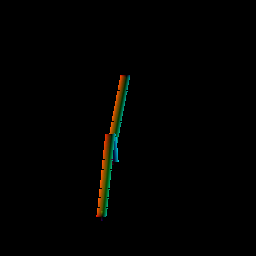

 10%|█         | 5/50 [00:18<02:44,  3.65s/it]

task:PutKnifeOnChoppingBoard  data:00006
1/149


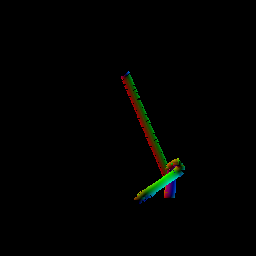

 12%|█▏        | 6/50 [00:21<02:36,  3.55s/it]

task:PutKnifeOnChoppingBoard  data:00007
1/148


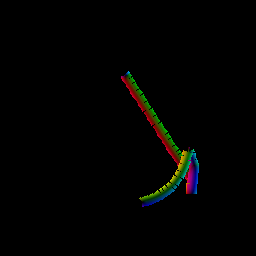

 14%|█▍        | 7/50 [00:24<02:25,  3.38s/it]

task:PutKnifeOnChoppingBoard  data:00008
1/125


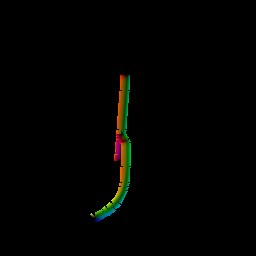

 16%|█▌        | 8/50 [00:27<02:13,  3.19s/it]

task:PutKnifeOnChoppingBoard  data:00009
1/122


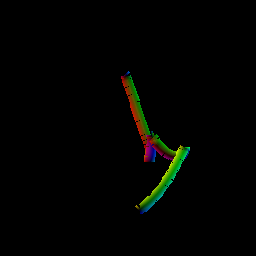

 18%|█▊        | 9/50 [00:30<02:09,  3.15s/it]

task:PutKnifeOnChoppingBoard  data:00010
1/116


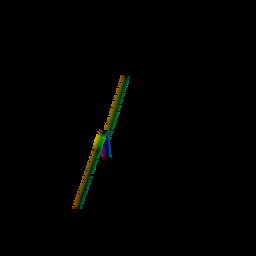

 20%|██        | 10/50 [00:32<01:57,  2.94s/it]

task:PutKnifeOnChoppingBoard  data:00011
1/127


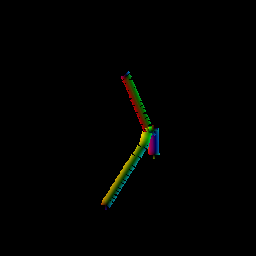

 22%|██▏       | 11/50 [00:35<01:52,  2.89s/it]

task:PutKnifeOnChoppingBoard  data:00012
1/174


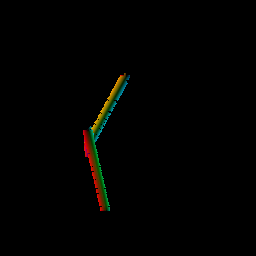

 24%|██▍       | 12/50 [00:38<01:51,  2.95s/it]

task:PutKnifeOnChoppingBoard  data:00013
1/212


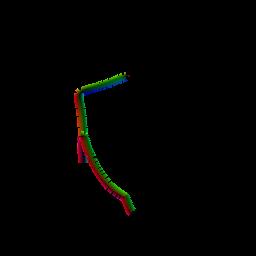

 26%|██▌       | 13/50 [00:42<01:59,  3.23s/it]

task:PutKnifeOnChoppingBoard  data:00014
1/161


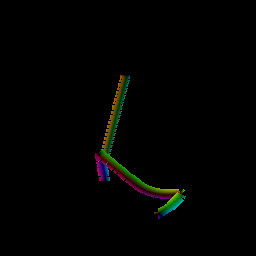

 28%|██▊       | 14/50 [00:46<01:57,  3.26s/it]

task:PutKnifeOnChoppingBoard  data:00015
1/178


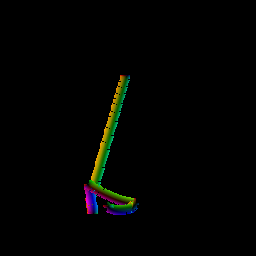

 30%|███       | 15/50 [00:49<01:54,  3.27s/it]

task:PutKnifeOnChoppingBoard  data:00016
1/169


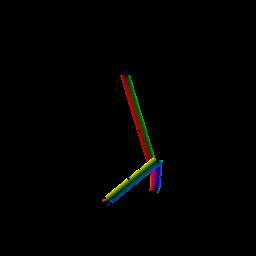

 32%|███▏      | 16/50 [00:52<01:50,  3.24s/it]

task:PutKnifeOnChoppingBoard  data:00017
1/115


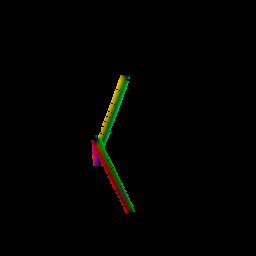

 34%|███▍      | 17/50 [00:55<01:40,  3.05s/it]

task:PutKnifeOnChoppingBoard  data:00018
1/119


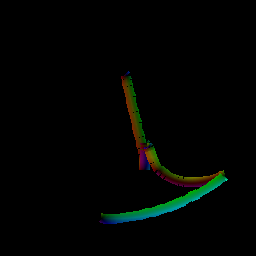

 36%|███▌      | 18/50 [00:58<01:44,  3.25s/it]

task:PutKnifeOnChoppingBoard  data:00019
1/167


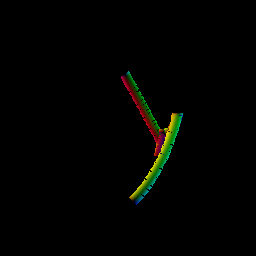

 38%|███▊      | 19/50 [01:02<01:48,  3.49s/it]

task:PutKnifeOnChoppingBoard  data:00020
1/155


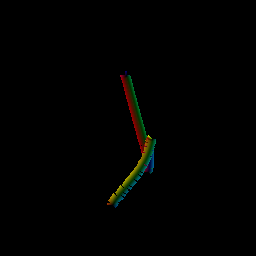

 40%|████      | 20/50 [01:06<01:42,  3.42s/it]

task:PutKnifeOnChoppingBoard  data:00021
1/184


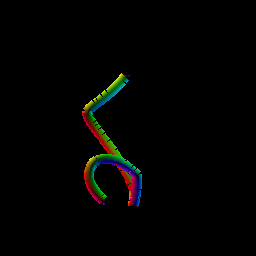

 42%|████▏     | 21/50 [01:09<01:42,  3.52s/it]

task:PutKnifeOnChoppingBoard  data:00022
1/116


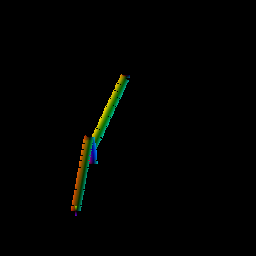

 44%|████▍     | 22/50 [01:12<01:32,  3.29s/it]

task:PutKnifeOnChoppingBoard  data:00023
1/178


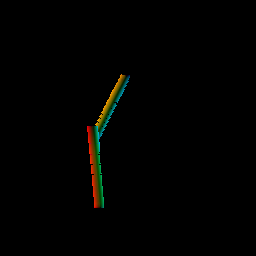

 46%|████▌     | 23/50 [01:16<01:31,  3.41s/it]

task:PutKnifeOnChoppingBoard  data:00024
1/165


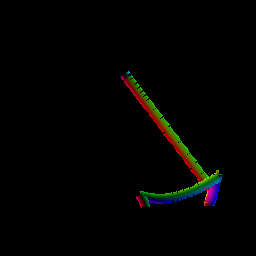

 48%|████▊     | 24/50 [01:20<01:31,  3.52s/it]

task:PutKnifeOnChoppingBoard  data:00025
1/195


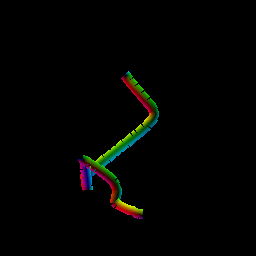

 50%|█████     | 25/50 [01:24<01:33,  3.72s/it]

task:PutKnifeOnChoppingBoard  data:00026
1/195


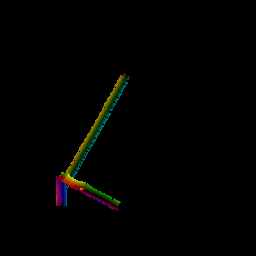

 52%|█████▏    | 26/50 [01:27<01:28,  3.69s/it]

task:PutKnifeOnChoppingBoard  data:00027
1/153


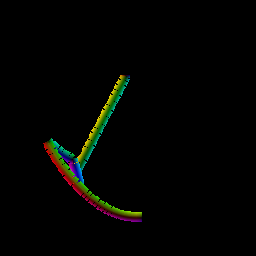

 54%|█████▍    | 27/50 [01:31<01:24,  3.69s/it]

task:PutKnifeOnChoppingBoard  data:00028
1/178


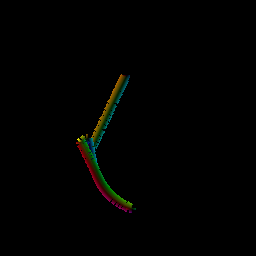

 56%|█████▌    | 28/50 [01:35<01:19,  3.61s/it]

task:PutKnifeOnChoppingBoard  data:00029
1/143


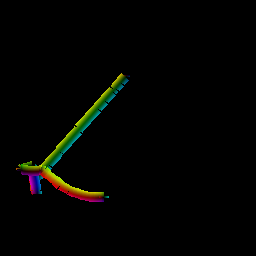

 58%|█████▊    | 29/50 [01:38<01:15,  3.59s/it]

task:PutKnifeOnChoppingBoard  data:00030
1/130


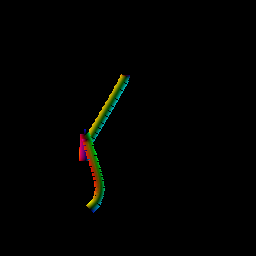

 60%|██████    | 30/50 [01:42<01:14,  3.70s/it]

task:PutKnifeOnChoppingBoard  data:00031
1/191


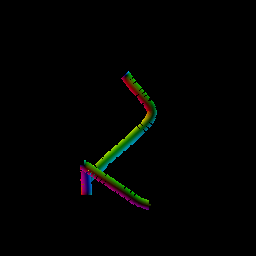

 62%|██████▏   | 31/50 [01:46<01:10,  3.72s/it]

task:PutKnifeOnChoppingBoard  data:00032
1/155


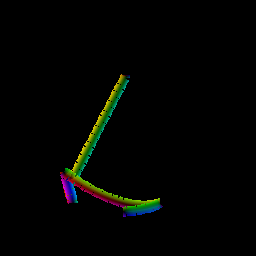

 64%|██████▍   | 32/50 [01:49<01:06,  3.71s/it]

task:PutKnifeOnChoppingBoard  data:00033
1/115


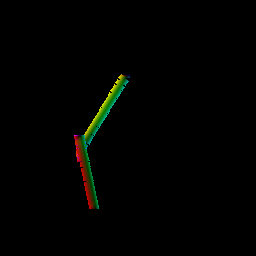

 66%|██████▌   | 33/50 [01:52<00:58,  3.44s/it]

task:PutKnifeOnChoppingBoard  data:00034
1/174


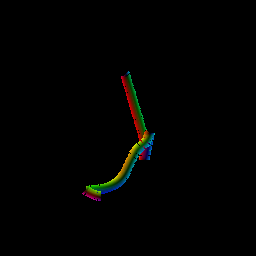

 68%|██████▊   | 34/50 [01:56<00:54,  3.39s/it]

task:PutKnifeOnChoppingBoard  data:00035
1/127


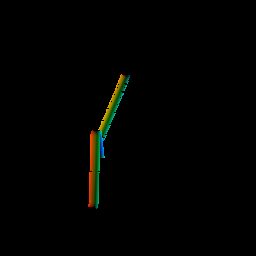

 70%|███████   | 35/50 [01:58<00:47,  3.18s/it]

task:PutKnifeOnChoppingBoard  data:00036
1/126


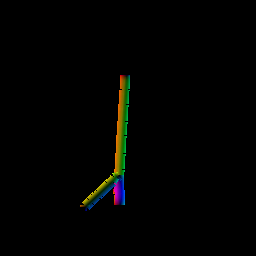

 72%|███████▏  | 36/50 [02:02<00:45,  3.24s/it]

task:PutKnifeOnChoppingBoard  data:00037
1/159


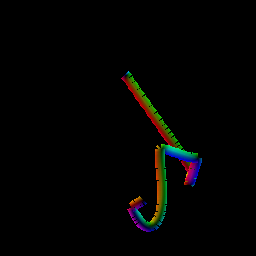

 74%|███████▍  | 37/50 [02:06<00:47,  3.63s/it]

task:PutKnifeOnChoppingBoard  data:00038
1/144


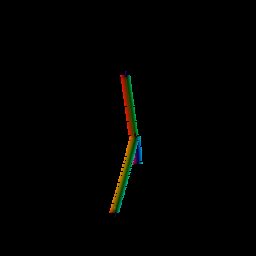

 76%|███████▌  | 38/50 [02:09<00:41,  3.42s/it]

task:PutKnifeOnChoppingBoard  data:00039
1/129


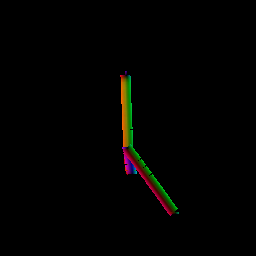

 78%|███████▊  | 39/50 [02:12<00:35,  3.26s/it]

task:PutKnifeOnChoppingBoard  data:00040
1/222


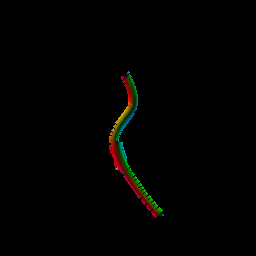

 80%|████████  | 40/50 [02:15<00:33,  3.34s/it]

task:PutKnifeOnChoppingBoard  data:00041
1/119


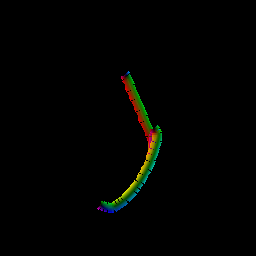

 82%|████████▏ | 41/50 [02:18<00:28,  3.13s/it]

task:PutKnifeOnChoppingBoard  data:00042
1/151


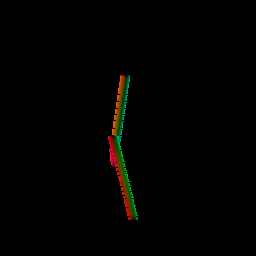

 84%|████████▍ | 42/50 [02:21<00:24,  3.10s/it]

task:PutKnifeOnChoppingBoard  data:00043
1/138


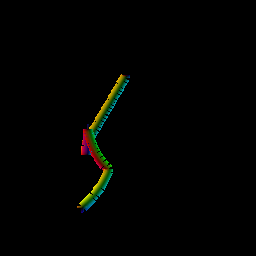

 86%|████████▌ | 43/50 [02:24<00:21,  3.04s/it]

task:PutKnifeOnChoppingBoard  data:00044
1/162


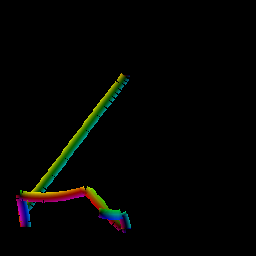

 88%|████████▊ | 44/50 [02:28<00:20,  3.39s/it]

task:PutKnifeOnChoppingBoard  data:00045
1/152


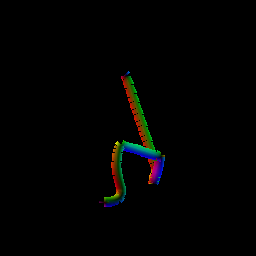

 90%|█████████ | 45/50 [02:32<00:16,  3.36s/it]

task:PutKnifeOnChoppingBoard  data:00046
1/144


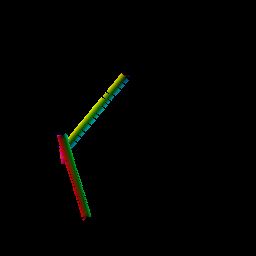

 92%|█████████▏| 46/50 [02:35<00:13,  3.26s/it]

task:PutKnifeOnChoppingBoard  data:00047
1/121


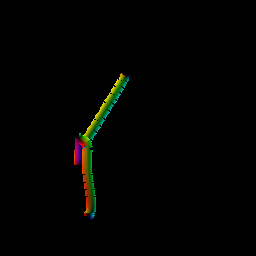

 94%|█████████▍| 47/50 [02:37<00:09,  3.13s/it]

task:PutKnifeOnChoppingBoard  data:00048
1/198


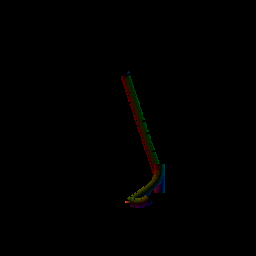

 96%|█████████▌| 48/50 [02:41<00:06,  3.25s/it]

task:PutKnifeOnChoppingBoard  data:00049
1/136


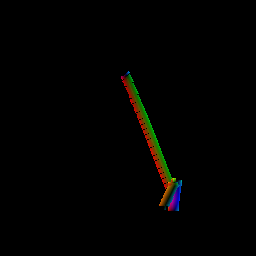

 98%|█████████▊| 49/50 [02:43<00:03,  3.03s/it]

task:PutKnifeOnChoppingBoard  data:00000
1/116


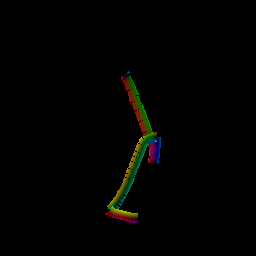

  0%|          | 0/50 [00:00<?, ?it/s]

task:TakePlateOffColoredDishRack  data:00001
1/135


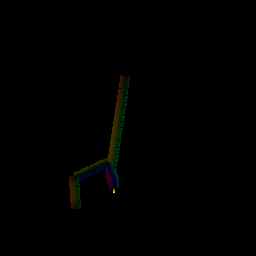

  2%|▏         | 1/50 [00:02<02:16,  2.79s/it]

task:TakePlateOffColoredDishRack  data:00002
1/143


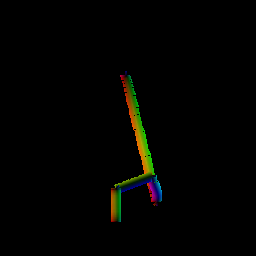

  4%|▍         | 2/50 [00:05<02:18,  2.88s/it]

task:TakePlateOffColoredDishRack  data:00003
1/190


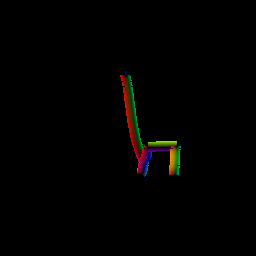

  6%|▌         | 3/50 [00:08<02:18,  2.95s/it]

task:TakePlateOffColoredDishRack  data:00004
1/223


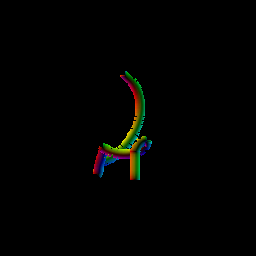

  8%|▊         | 4/50 [00:13<02:30,  3.27s/it]

task:TakePlateOffColoredDishRack  data:00005
1/127


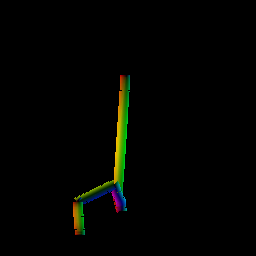

 10%|█         | 5/50 [00:16<02:33,  3.42s/it]

task:TakePlateOffColoredDishRack  data:00006
1/142


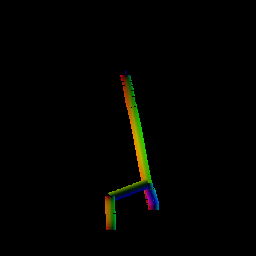

 12%|█▏        | 6/50 [00:20<02:32,  3.47s/it]

task:TakePlateOffColoredDishRack  data:00007
1/129


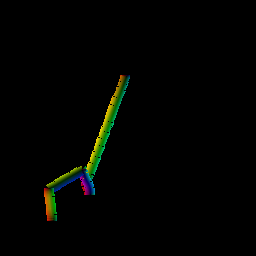

 14%|█▍        | 7/50 [00:23<02:20,  3.26s/it]

task:TakePlateOffColoredDishRack  data:00008
1/131


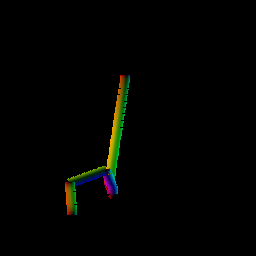

 16%|█▌        | 8/50 [00:26<02:11,  3.14s/it]

task:TakePlateOffColoredDishRack  data:00009
1/147


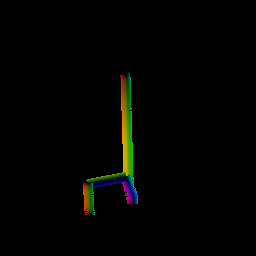

 18%|█▊        | 9/50 [00:29<02:10,  3.19s/it]

task:TakePlateOffColoredDishRack  data:00010
1/134


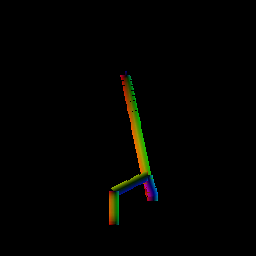

 20%|██        | 10/50 [00:32<02:04,  3.12s/it]

task:TakePlateOffColoredDishRack  data:00011
1/194


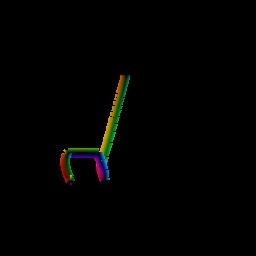

 22%|██▏       | 11/50 [00:35<02:03,  3.17s/it]

task:TakePlateOffColoredDishRack  data:00012
1/129


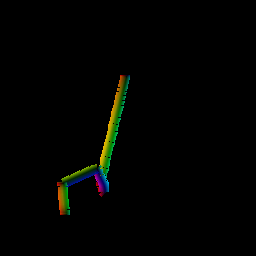

 24%|██▍       | 12/50 [00:38<01:58,  3.11s/it]

task:TakePlateOffColoredDishRack  data:00013
1/158


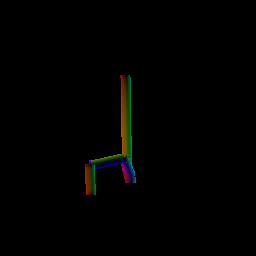

 26%|██▌       | 13/50 [00:41<01:54,  3.11s/it]

task:TakePlateOffColoredDishRack  data:00014
1/131


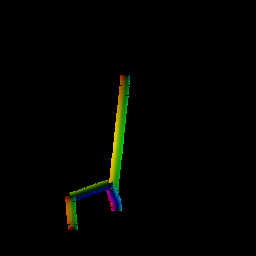

 28%|██▊       | 14/50 [00:44<01:53,  3.16s/it]

task:TakePlateOffColoredDishRack  data:00015
1/176


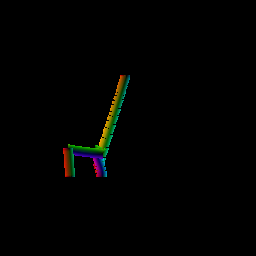

 30%|███       | 15/50 [00:48<01:51,  3.18s/it]

task:TakePlateOffColoredDishRack  data:00016
1/165


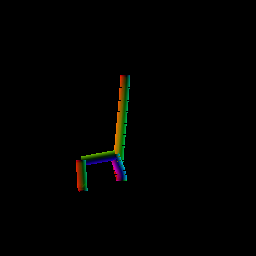

 32%|███▏      | 16/50 [00:51<01:47,  3.17s/it]

task:TakePlateOffColoredDishRack  data:00017
1/223


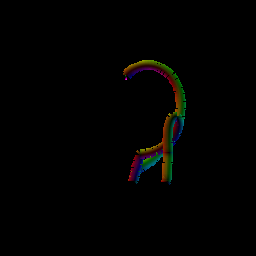

 34%|███▍      | 17/50 [00:55<01:58,  3.59s/it]

task:TakePlateOffColoredDishRack  data:00018
1/220


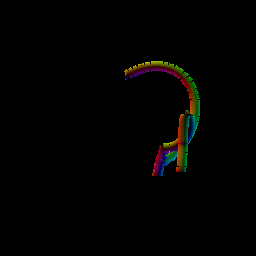

 36%|███▌      | 18/50 [01:00<02:03,  3.87s/it]

task:TakePlateOffColoredDishRack  data:00019
1/170


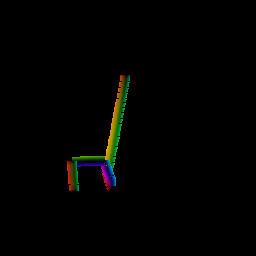

 38%|███▊      | 19/50 [01:03<01:52,  3.62s/it]

task:TakePlateOffColoredDishRack  data:00020
1/191


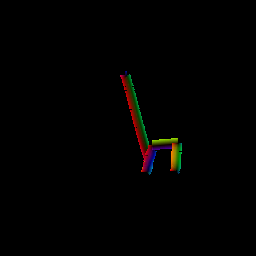

 40%|████      | 20/50 [01:06<01:43,  3.44s/it]

task:TakePlateOffColoredDishRack  data:00021
1/142


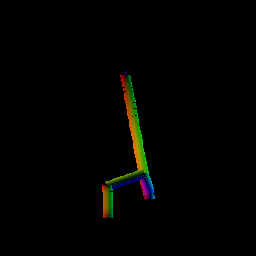

 42%|████▏     | 21/50 [01:09<01:36,  3.31s/it]

task:TakePlateOffColoredDishRack  data:00022
1/181


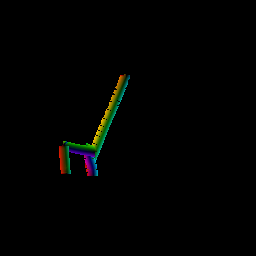

 44%|████▍     | 22/50 [01:12<01:32,  3.29s/it]

task:TakePlateOffColoredDishRack  data:00023
1/203


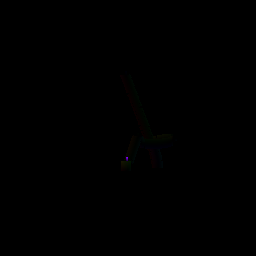

 46%|████▌     | 23/50 [01:16<01:31,  3.38s/it]

task:TakePlateOffColoredDishRack  data:00024
1/175


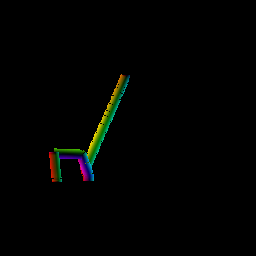

 48%|████▊     | 24/50 [01:20<01:31,  3.53s/it]

task:TakePlateOffColoredDishRack  data:00025
1/136


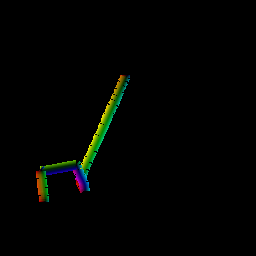

 50%|█████     | 25/50 [01:23<01:24,  3.37s/it]

task:TakePlateOffColoredDishRack  data:00026
1/234


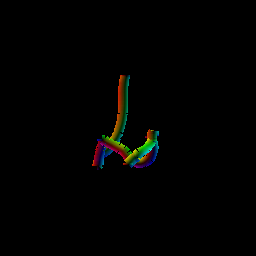

 52%|█████▏    | 26/50 [01:27<01:25,  3.58s/it]

task:TakePlateOffColoredDishRack  data:00027
1/138


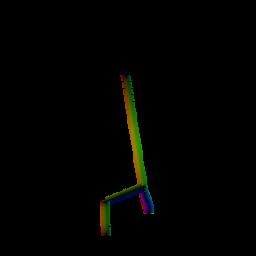

 54%|█████▍    | 27/50 [01:30<01:21,  3.52s/it]

task:TakePlateOffColoredDishRack  data:00028
1/138


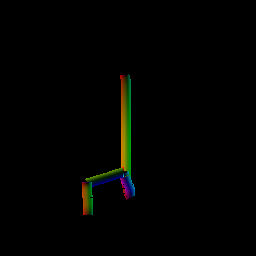

 56%|█████▌    | 28/50 [01:33<01:14,  3.39s/it]

task:TakePlateOffColoredDishRack  data:00029
1/134


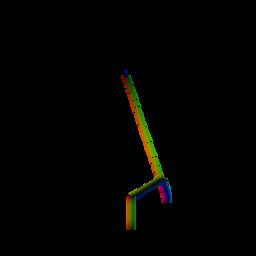

 58%|█████▊    | 29/50 [01:36<01:07,  3.24s/it]

task:TakePlateOffColoredDishRack  data:00030
1/221


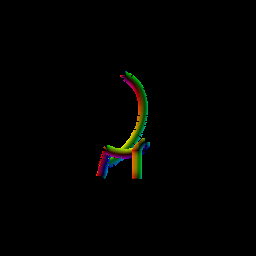

 60%|██████    | 30/50 [01:40<01:08,  3.42s/it]

task:TakePlateOffColoredDishRack  data:00031
1/229


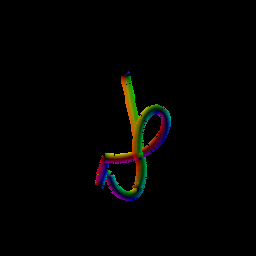

 62%|██████▏   | 31/50 [01:45<01:14,  3.90s/it]

task:TakePlateOffColoredDishRack  data:00032
1/229


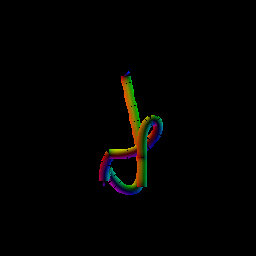

 64%|██████▍   | 32/50 [01:50<01:14,  4.11s/it]

task:TakePlateOffColoredDishRack  data:00033
1/139


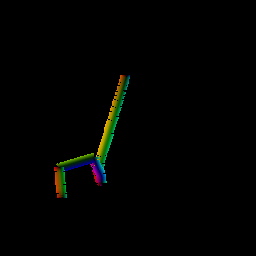

 66%|██████▌   | 33/50 [01:52<01:03,  3.74s/it]

task:TakePlateOffColoredDishRack  data:00034
1/140


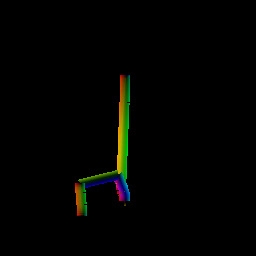

 68%|██████▊   | 34/50 [01:56<00:58,  3.68s/it]

task:TakePlateOffColoredDishRack  data:00035
1/127


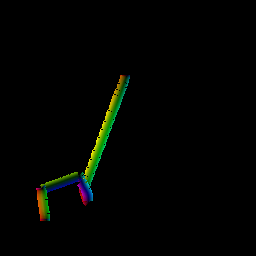

 70%|███████   | 35/50 [02:00<00:56,  3.79s/it]

task:TakePlateOffColoredDishRack  data:00036
1/170


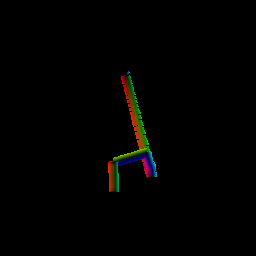

 72%|███████▏  | 36/50 [02:03<00:50,  3.63s/it]

task:TakePlateOffColoredDishRack  data:00037
1/220


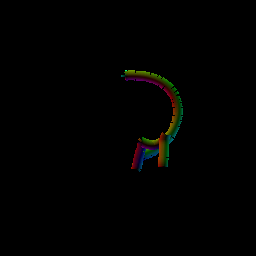

 74%|███████▍  | 37/50 [02:07<00:48,  3.70s/it]

task:TakePlateOffColoredDishRack  data:00038
1/222


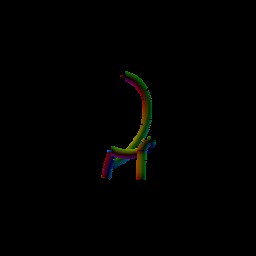

 76%|███████▌  | 38/50 [02:11<00:45,  3.76s/it]

task:TakePlateOffColoredDishRack  data:00039
1/191


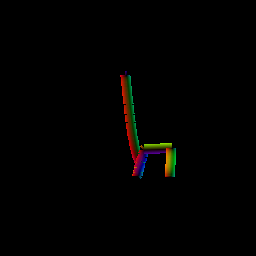

 78%|███████▊  | 39/50 [02:14<00:39,  3.60s/it]

task:TakePlateOffColoredDishRack  data:00040
1/126


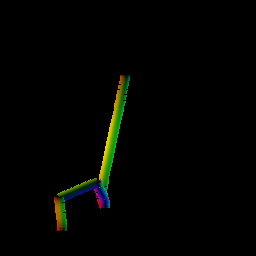

 80%|████████  | 40/50 [02:17<00:34,  3.45s/it]

task:TakePlateOffColoredDishRack  data:00041
1/228


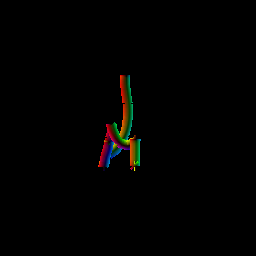

 82%|████████▏ | 41/50 [02:22<00:35,  3.94s/it]

task:TakePlateOffColoredDishRack  data:00042
1/124


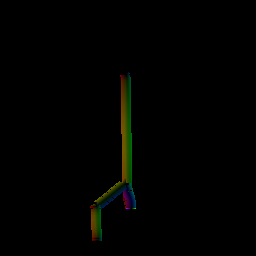

 84%|████████▍ | 42/50 [02:26<00:30,  3.84s/it]

task:TakePlateOffColoredDishRack  data:00043
1/151


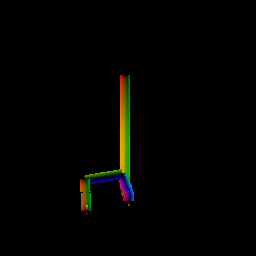

 86%|████████▌ | 43/50 [02:29<00:25,  3.63s/it]

task:TakePlateOffColoredDishRack  data:00044
1/186


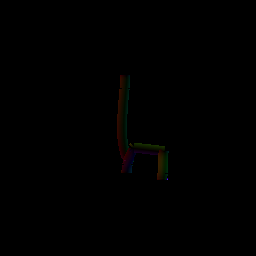

 88%|████████▊ | 44/50 [02:33<00:21,  3.54s/it]

task:TakePlateOffColoredDishRack  data:00045
1/196


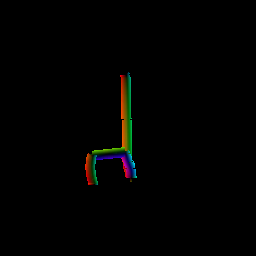

 90%|█████████ | 45/50 [02:36<00:17,  3.43s/it]

task:TakePlateOffColoredDishRack  data:00046
1/222


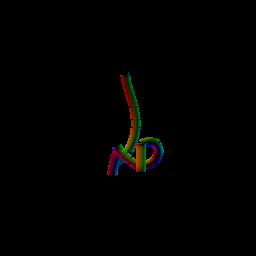

 92%|█████████▏| 46/50 [02:40<00:14,  3.62s/it]

task:TakePlateOffColoredDishRack  data:00047
1/188


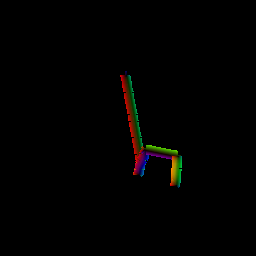

 94%|█████████▍| 47/50 [02:44<00:11,  3.71s/it]

task:TakePlateOffColoredDishRack  data:00048
1/140


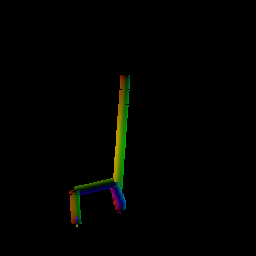

 96%|█████████▌| 48/50 [02:47<00:07,  3.52s/it]

task:TakePlateOffColoredDishRack  data:00049
1/198


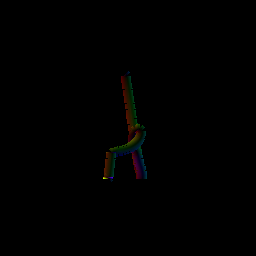

 98%|█████████▊| 49/50 [02:50<00:03,  3.49s/it]

task:TakePlateOffColoredDishRack  data:00000
1/161


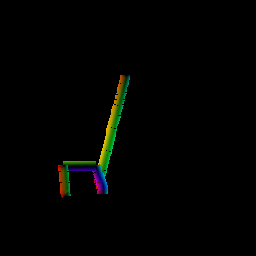

100%|██████████| 50/50 [02:53<00:00,  3.48s/it]


In [4]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np
from tqdm import tqdm

dataset_root = os.path.abspath("../dataset/RLBench4/val")

for task_name in os.listdir(dataset_root):
    if 'json' in task_name:
        continue
    
    task_dir = os.path.join(dataset_root, task_name)
    for data_index in tqdm(os.listdir(task_dir)):
        print("task:{}  data:{}".format(task_name, data_index))
        data_dir = os.path.join(task_dir, data_index)
        base_data_dir = os.path.join(data_dir, "base_data")
        additional_dir = os.path.join(data_dir, "additional_info")
        vector_save_dir = os.path.join(additional_dir, "vector_map")
        rotation_save_dir = os.path.join(additional_dir, "rotation_map")
        depth_save_dir = os.path.join(additional_dir, "depth_map")
        
        os.makedirs(vector_save_dir, exist_ok=True)
        os.makedirs(rotation_save_dir, exist_ok=True)
        os.makedirs(depth_save_dir, exist_ok=True)
        
        u_list, v_list = [], []
        pickle_file_list = os.listdir(base_data_dir)
        pickle_file_list.sort()
        grasp_list = []
        intensity_list = []
        rotation_list = []
        depth_list = []
        
        for i, pickle_filename in enumerate(pickle_file_list):
            with open(os.path.join(base_data_dir, pickle_filename), 'rb') as f:
                pickle_data = pickle.load(f)
                intrinsic_matrix = pickle_data['front_intrinsic_matrix']
                extrinsic_matrix = pickle_data['front_extrinsic_matrix']
                camera2world_matrix = np.linalg.inv(extrinsic_matrix)

                pose = np.append(pickle_data['gripper_pose'][:3], 1)
                pose = np.array(np.dot(camera2world_matrix, pose))
                depth_list.append(pose[2])
                pose = pose / pose[2]
                uv = np.dot(intrinsic_matrix, pose[:3])
                u_list.append(uv[0])
                v_list.append(uv[1])
                
                intensity = int(255 * ((i + 1) / len(pickle_file_list)))
                intensity_list.append(intensity)
                
                gripper_matrix = np.dot(camera2world_matrix, pickle_data['gripper_matrix'])
                rotation_mat = gripper_matrix[:3,:3]
                rotation_list.append(rotation_mat)
            
        # get velocity
        u_vel_list, v_vel_list = [], []
        for i in range(len(pickle_file_list) - 1):
            u_vel = u_list[i + 1] - u_list[i]
            v_vel = v_list[i + 1] - v_list[i]
            u_vel_list.append(u_vel)
            v_vel_list.append(v_vel)
        
        for i, pickle_filename in enumerate(pickle_file_list):
            print("{}/{}".format(i + 1, len(pickle_file_list)))
            head, ext = os.path.splitext(pickle_filename)
            
            vel_map = np.zeros((2, 256, 256))
            depth_map = np.zeros((1, 256, 256))
            rotation_map = np.zeros((9, 256, 256))
            eular_map = np.zeros((256, 256, 3))
            
            for j in range(len(u_list[i:]) - 2):
                pos_img = Image.new('L',(256,256))
                d = ImageDraw.Draw(pos_img)
                
                u = round(u_list[i + j])
                v = round(v_list[i + j])
                           
                intensity = intensity_list[i+j]
                d.line([(int(u_list[i + j + 1]), int(v_list[i + j + 1])), (int(u_list[i + j]), int(v_list[i + j]))], fill=(255), width=10)
#                 display(pos_img)
                
                pos_np = np.array(pos_img)
                a_list, b_list = np.where(pos_np > 0)
                for a, b in zip(a_list, b_list):
                    target_uv_vel, target_depth, target_rotation, target_euler, valid = calucate_values(b,a, 
                          u_list[i+j], v_list[i+j], u_vel_list[i+j], v_vel_list[i+j], depth_list[i+j], rotation_list[i+j], 
                          u_list[i+j+1], v_list[i+j+1], u_vel_list[i+j+1], v_vel_list[i+j+1], depth_list[i+j+1], rotation_list[i+j+1])
                    if valid:
                        vel_map[:,a,b] = target_uv_vel
                        depth_map[:,a,b] = target_depth
                        rotation_map[:,a,b] = target_rotation.flatten()
                        eular_map[a,b,:] = target_euler.flatten()
            
            vel_img_path = os.path.join(vector_save_dir, 'vector_img_{}.png'.format(head))
            vel_map_path = os.path.join(vector_save_dir, 'vector_data_{}.npy'.format(head))
            vel_img = make_vel_image(vel_map)
            vel_img.save(vel_img_path)
            np.save(vel_map_path, vel_map)

#             rotation_img_path = os.path.join(rotation_save_dir, 'rotation_img_{}.png'.format(head))
#             rotation_map_path = os.path.join(rotation_save_dir, 'rotation_data_{}.npy'.format(head))
#             rotation_img = make_rotation_image(eular_map)
#             rotation_img.save(rotation_img_path)
#             np.save(rotation_map_path, rotation_map)

#             depth_img_path = os.path.join(depth_save_dir, 'depth_img_{}.png'.format(head))
#             depth_map_path = os.path.join(depth_save_dir, 'depth_data_{}.npy'.format(head))
#             depth_img = make_depth_image(depth_map[0])
#             depth_img.save(depth_img_path)
#             np.save(depth_map_path, depth_map)
            
            if i == 0:
                display(vel_img)
#                 display(depth_img)
#                 display(rotation_img)
                break
#             pos_img.save(img_path)

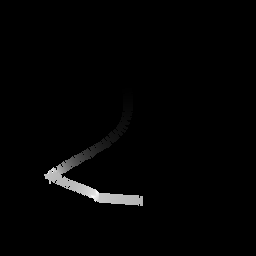

In [31]:
def make_depth_image(depth_map):
    minimum_value = np.unique(depth_map)[1]
    normalized_depth = np.where(depth_map != 0, depth_map - minimum_value, 0)
    normalized_depth = cv2.normalize(normalized_depth,None,0,255,cv2.NORM_MINMAX)
    return Image.fromarray(normalized_depth.astype('uint8'))

make_depth_image(depth_map[0])

[0.00000000e+00 7.35745405e-04 1.02750131e-03 ... 2.54441324e+02
 2.54455445e+02 2.54858636e+02]


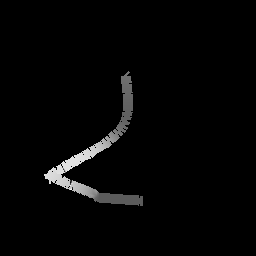

In [33]:
def make_rotation_image(eular_map):
    eular_map = np.where(eular_map < 0, abs(eular_map), eular_map)
    eular_map = eular_map / 180 * 255
    return Image.fromarray(eular_map.astype('uint8'))

eular_map_test = np.where(eular_map < 0, abs(eular_map), eular_map)
eular_map_test = eular_map_test / 180 * 255
print(np.unique(eular_map_test))
Image.fromarray(eular_map_test[:,:,2].astype('uint8'))

In [14]:
from scipy.spatial.transform import Rotation as R
from scipy.spatial.transform import Slerp

key_rots = R.random(2)
key_times = [0, 1]

print(key_rots.as_euler('xyz', degrees=True))

slerp = Slerp(key_times, key_rots)

times = [0.25]
interp_rots = slerp(times)

print(interp_rots.as_euler('xyz', degrees=True))

[[-76.24315317 -29.94881569 -30.96451701]
 [-77.60805526 -18.28372593 142.92681152]]
[[-80.91839921 -28.49045828  14.45358822]]


In [23]:
np.unique(depth_map[0])

array([0.        , 1.4152343 , 1.41530133, ..., 1.69548609, 1.69694326,
       1.70124855])

In [ ]:

mag, ang = cv2.cartToPolar(vel_map[0], vel_map[1])
hsv = np.zeros((256,256,3))
hsv[...,1] = 255
hsv[:,:,0] = ang*180/np.pi/2
hsv[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv.astype('uint8'),cv2.COLOR_HSV2RGB)
Image.fromarray(rgb)

In [24]:
# given
start_uv_velocity = np.array([3,3])
start_uvz_pos = np.array([25,25,1.05])
r = R.from_euler('zyx',[180, 0, 0],degrees=True)
start_angle_matrix = r.as_matrix()

goal_uv_velocity = np.array([2,2])
goal_uvz_pos = np.array([28,28,1.10])
r = R.from_euler('zyx',[190, 0, 0],degrees=True)
goal_angle_matrix = r.as_matrix()

target_uv = np.array([27,27])

# calculate
sg_uv_vec = goal_uvz_pos[:2] - start_uvz_pos[:2]
print("sg_uv_vec")
print(sg_uv_vec)

norm_sg_uv_vec = np.linalg.norm(sg_uv_vec, ord=2)
print("sg_uv_vec norm")
print(norm_sg_uv_vec)

st_uv_vec = target_uv - start_uvz_pos[:2]
print("st_uv_vec")
print(st_uv_vec)

norm_sh_uv_vec = np.dot(sg_uv_vec / norm_sg_uv_vec, st_uv_vec)
print("norm_sh_uv_vec")
print(norm_sh_uv_vec)

ratio = (norm_sh_uv_vec / norm_sg_uv_vec)
print("ratio")
print(ratio)

sh_uv_vec = sg_uv_vec * ratio
print("sh_uv_vec")
print(sh_uv_vec)

uv_velocity_h = (start_uv_velocity * (1 - ratio)) + (goal_uv_velocity * ratio)
print("uv velocity at h")
print(uv_velocity_h)

uv_velocity_t = uv_velocity_h + (sh_uv_vec - st_uv_vec)
print("uv velocity at t")
print(uv_velocity_t)

depth_t = (start_uvz_pos[2] * (1 - ratio)) + (goal_uvz_pos[2] * ratio)
print("depth at t")
print(depth_t)

start_angle = R.from_matrix(start_angle_matrix)
start_angle_rotvec = start_angle.as_rotvec()
print(start_angle_rotvec)

goal_angle = R.from_matrix(goal_angle_matrix)
goal_angle_rotvec = goal_angle.as_rotvec()
print(goal_angle_rotvec)

goal_angle_rotvec = np.where(goal_angle_rotvec < 0, 2 * np.pi + goal_angle_rotvec, goal_angle_rotvec)
print(goal_angle_rotvec)

angle_diff = (goal_angle_rotvec - start_angle_rotvec)
print(angle_diff)

half_angle_diff = np.where(angle_diff > np.pi, (angle_diff - (2 * np.pi)) * ratio, angle_diff * ratio)
print(half_angle_diff)

target_angle_rotvec = start_angle_rotvec + half_angle_diff
target_angle = R.from_rotvec(target_angle_rotvec)
print(target_angle.as_euler('zyx',degrees=True))

angle_transition = np.concatenate([start_angle_matrix[np.newaxis,:,:], goal_angle_matrix[np.newaxis,:,:]], 0)
angle_transition = R.from_matrix(angle_transition)
slerp = Slerp([0,1], angle_transition)
interp_rots = slerp(ratio)
print(interp_rots.as_euler('zyx',degrees=True))

sg_uv_vec
[3. 3.]
sg_uv_vec norm
4.242640687119285
st_uv_vec
[2. 2.]
norm_sh_uv_vec
2.8284271247461903
ratio
0.6666666666666667
sh_uv_vec
[2. 2.]
uv velocity at h
[2.33333333 2.33333333]
uv velocity at t
[2.33333333 2.33333333]
depth at t
1.0833333333333335
[0.         0.         3.14159265]
[-0.         -0.         -2.96705973]
[-0.         -0.          3.31612558]
[-0.         -0.          0.17453293]
[-0.         -0.          0.11635528]
[-173.33333333    0.            0.        ]
[-173.33333333    0.            0.        ]


In [25]:
a = np.array([1,2,3,4,5,6])

np.where(a > 3, a*2, 0)

array([ 0,  0,  0,  8, 10, 12])

-------------------------------------------

task:StackWine  data:00001
1
2
4
5
7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


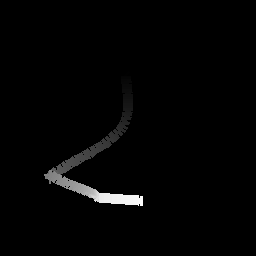

2
4
5
7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


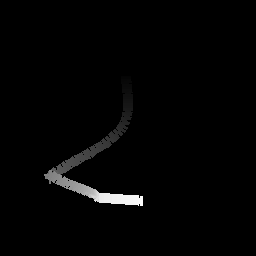

4
5
7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


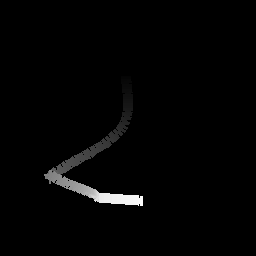

5
7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


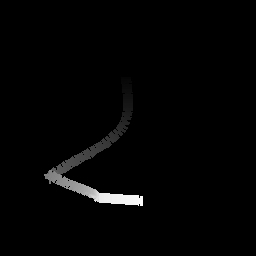

7
8
10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


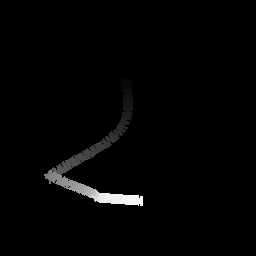

8
10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


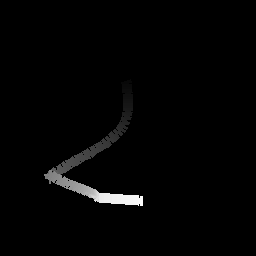

10
11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


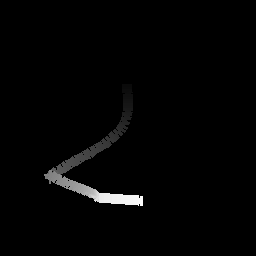

11
13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


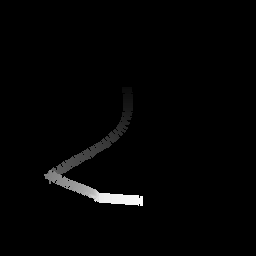

13
14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


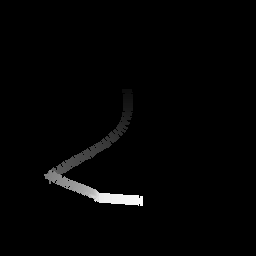

14
16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


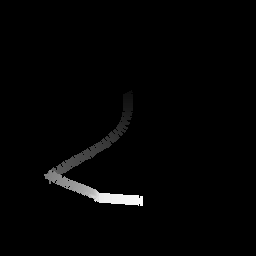

16
17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


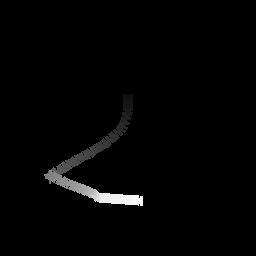

17
19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


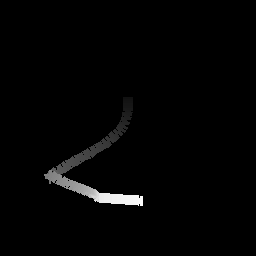

19
20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


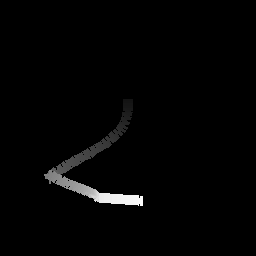

20
22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


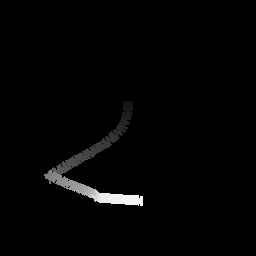

22
23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


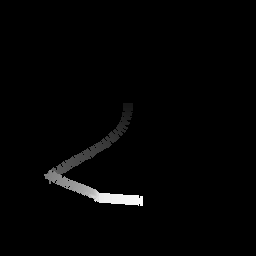

23
25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


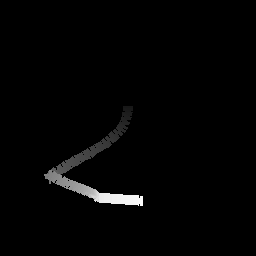

25
26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


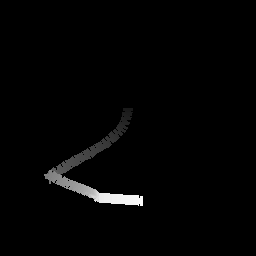

26
28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


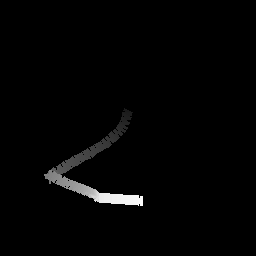

28
29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


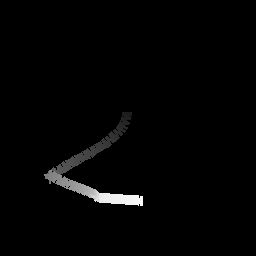

29
31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


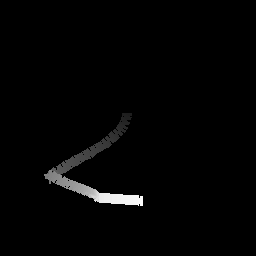

31
32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


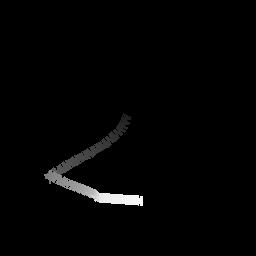

32
34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


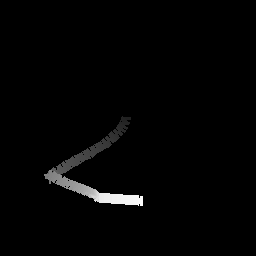

34
35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


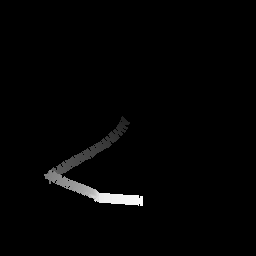

35
37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


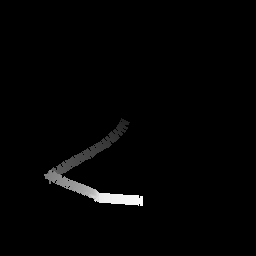

37
38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


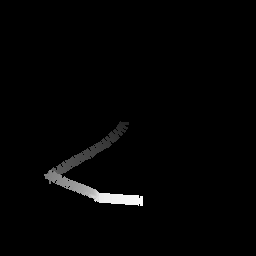

38
40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


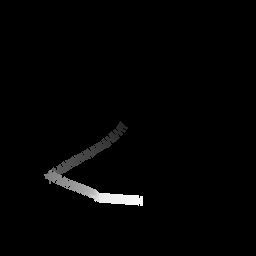

40
41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


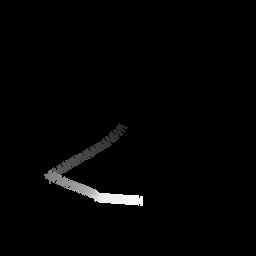

41
42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


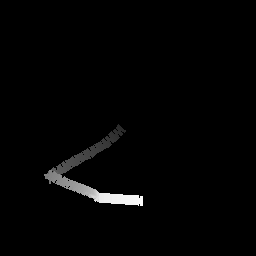

42
44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


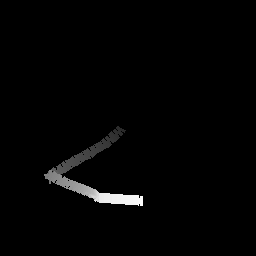

44
45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


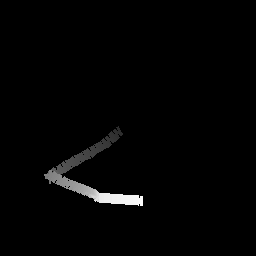

45
47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


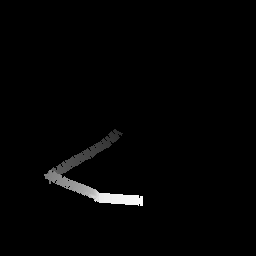

47
48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


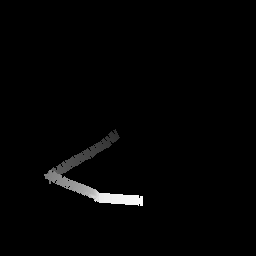

48
50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


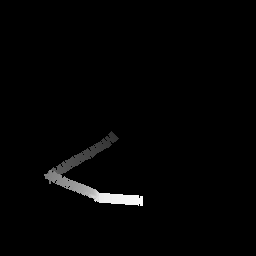

50
51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


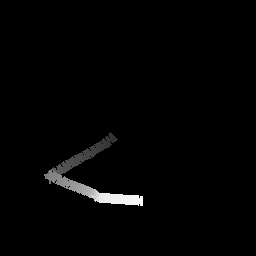

51
53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


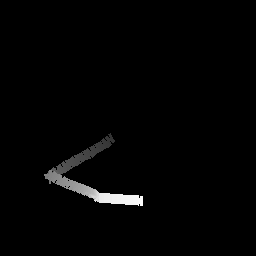

53
54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


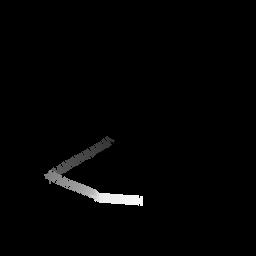

54
56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


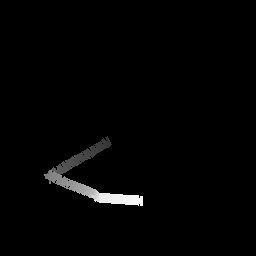

56
57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


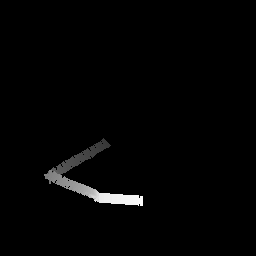

57
59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


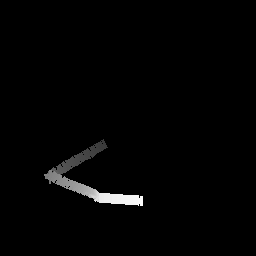

59
60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


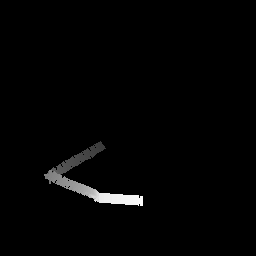

60
62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


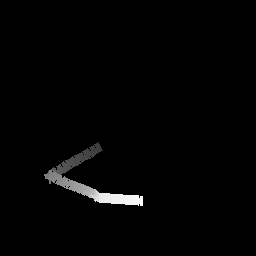

62
63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


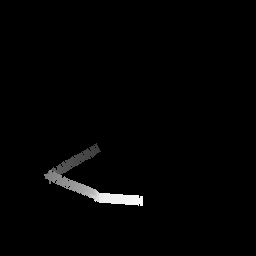

63
65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


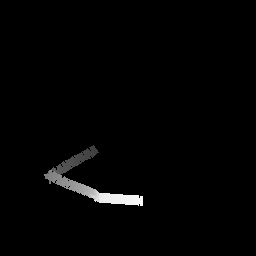

65
66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


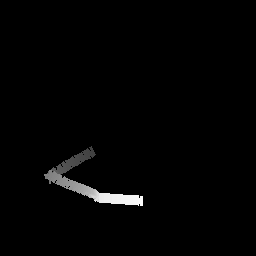

66
68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


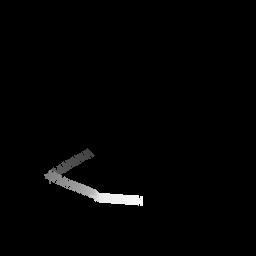

68
69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


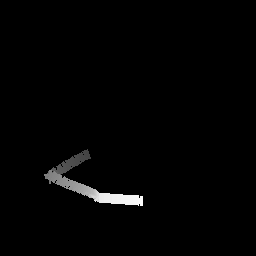

69
71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


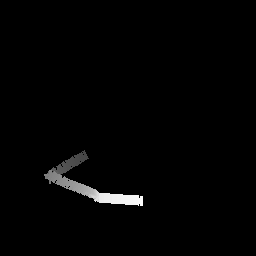

71
72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


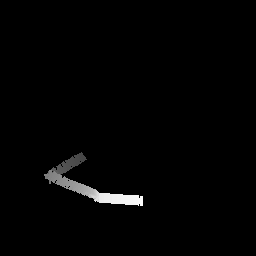

72
74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


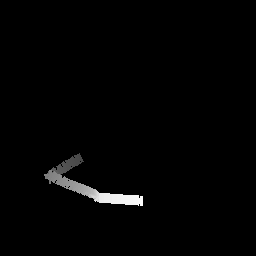

74
75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


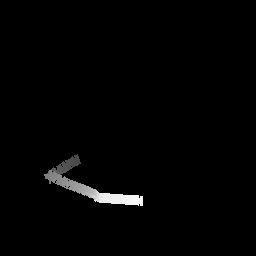

75
77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


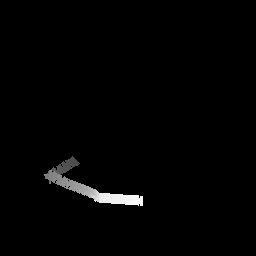

77
78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


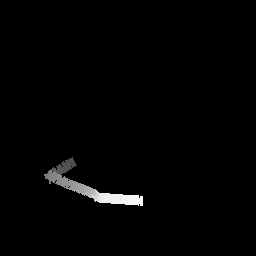

78
80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


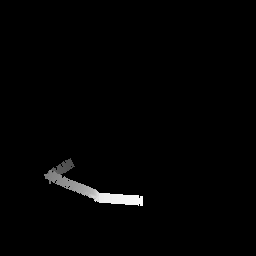

80
81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


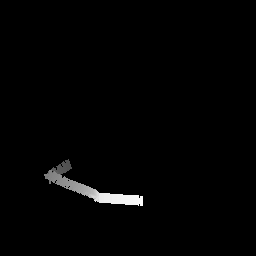

81
83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


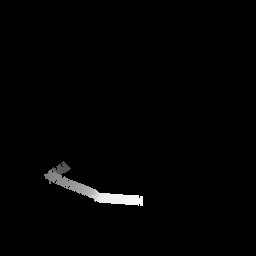

83
84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


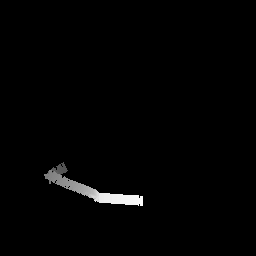

84
85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


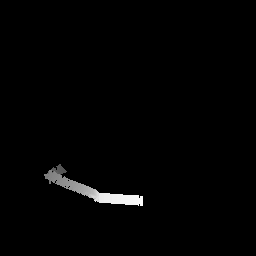

85
87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


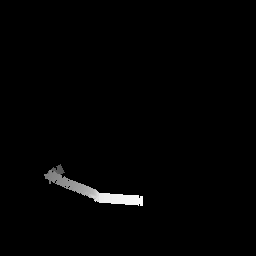

87
88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


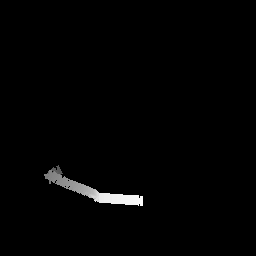

88
90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


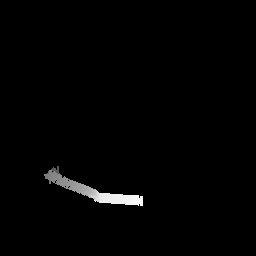

90
91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


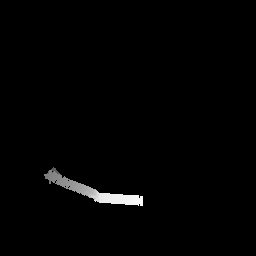

91
93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


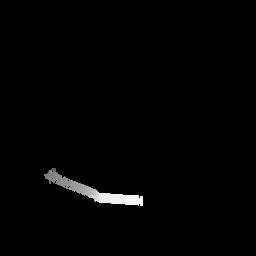

93
94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


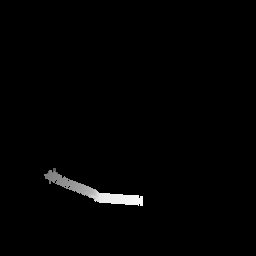

94
96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


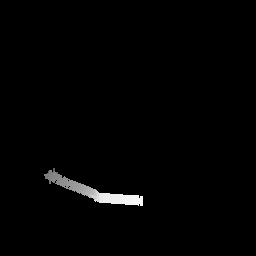

96
97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


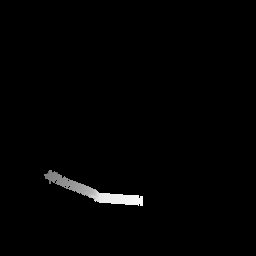

97
99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


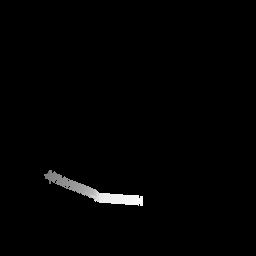

99
100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


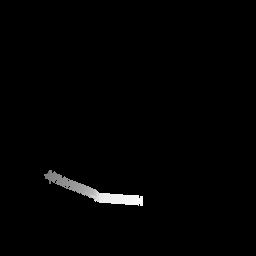

100
102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


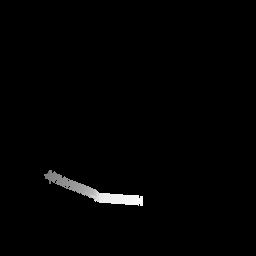

102
103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


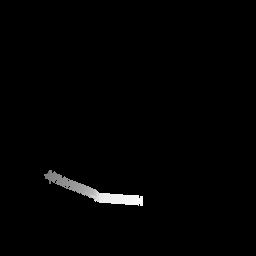

103
105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


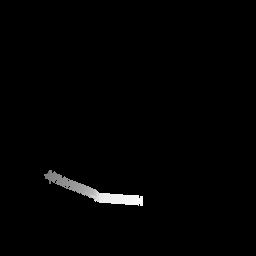

105
106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


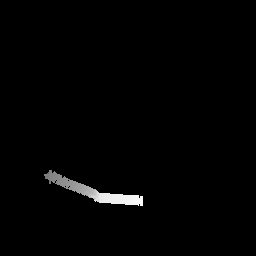

106
108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


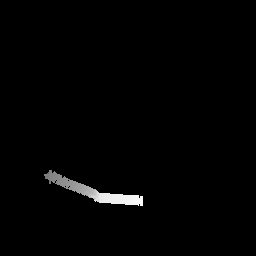

108
109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


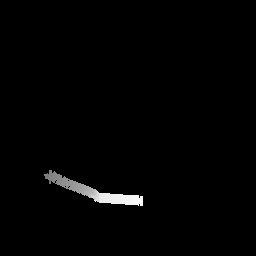

109
111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


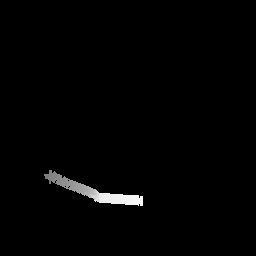

111
112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


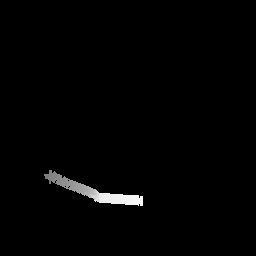

112
114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


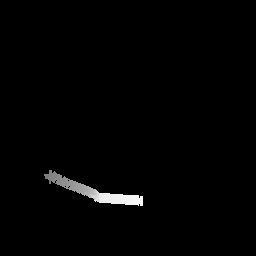

114
115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


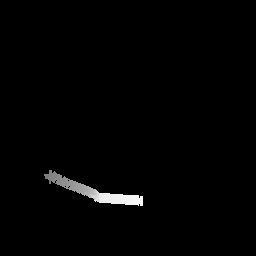

115
117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


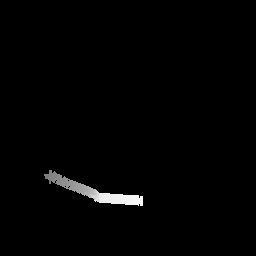

117
118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


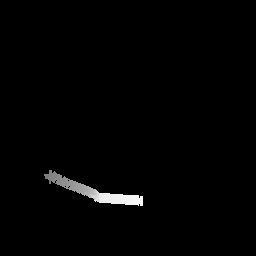

118
120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


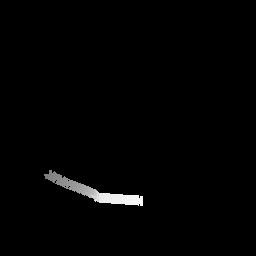

120
121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


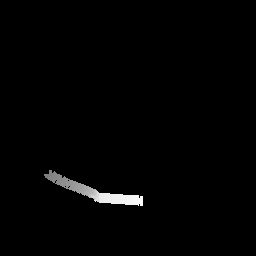

121
123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


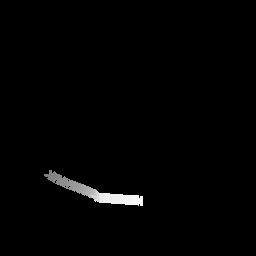

123
124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


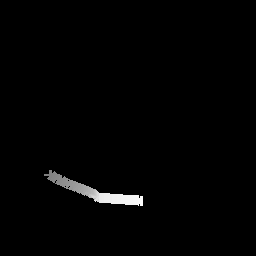

124
126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


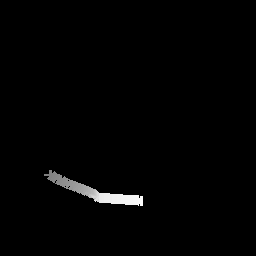

126
127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


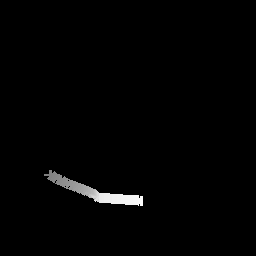

127
128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


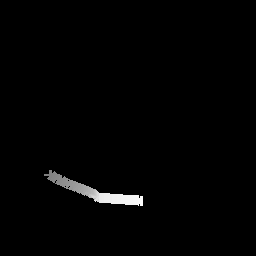

128
130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


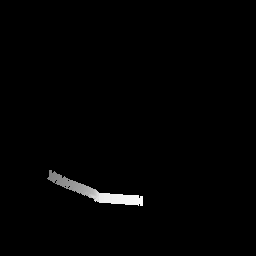

130
131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


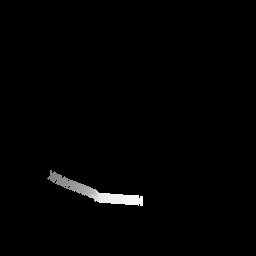

131
133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


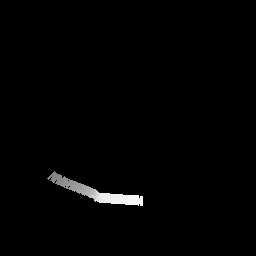

133
134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


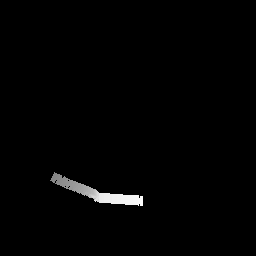

134
136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


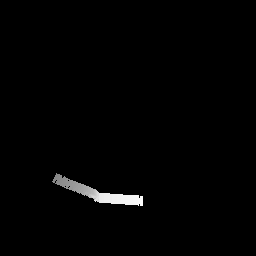

136
137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


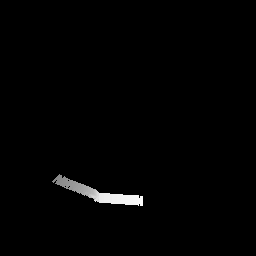

137
139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


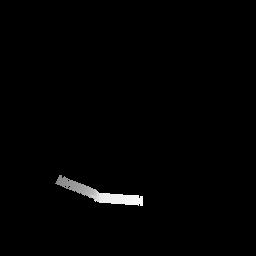

139
140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


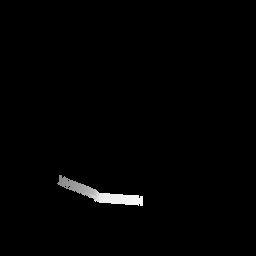

140
142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


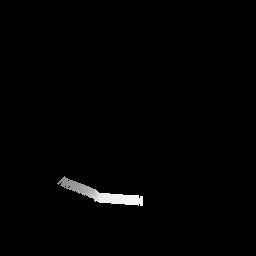

142
143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


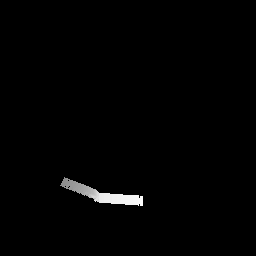

143
145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


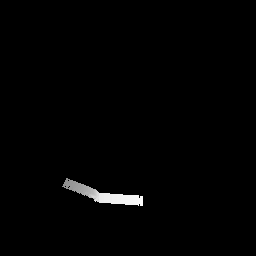

145
146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


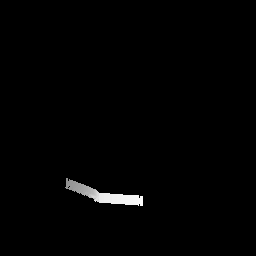

146
148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


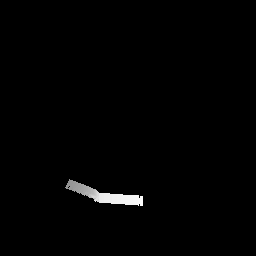

148
149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


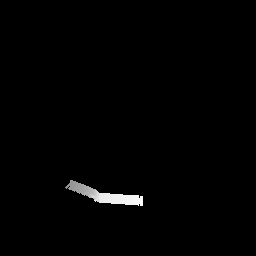

149
151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


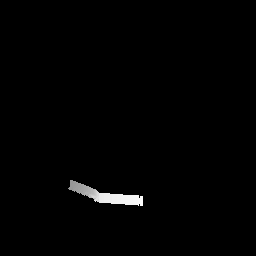

151
152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


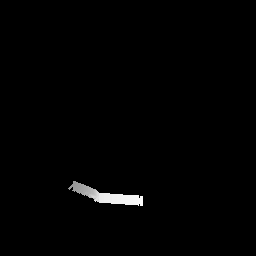

152
154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


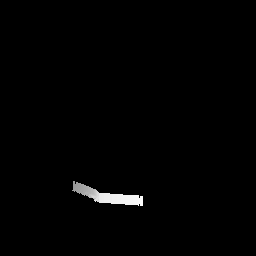

154
155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


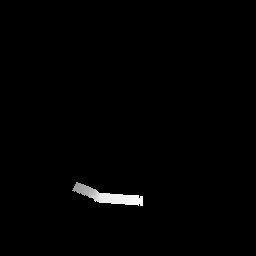

155
157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


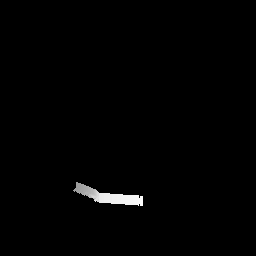

157
158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


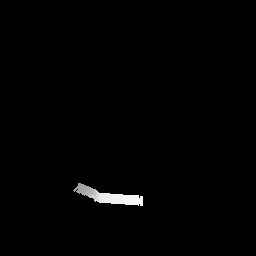

158
160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


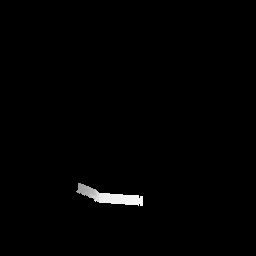

160
161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


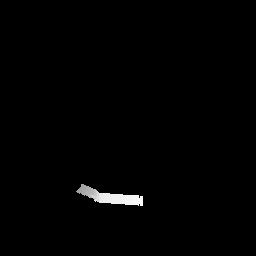

161
163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


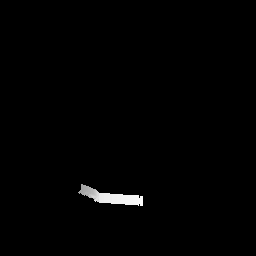

163
164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


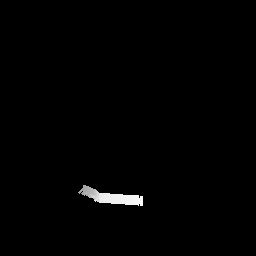

164
166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


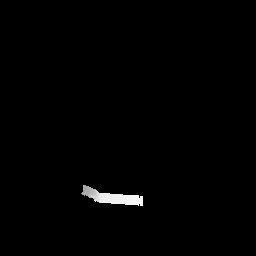

166
167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


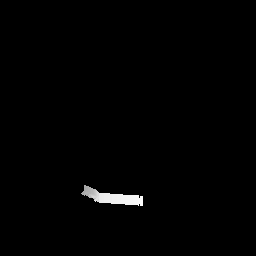

167
169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


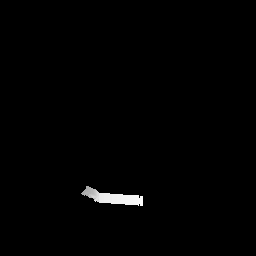

169
170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


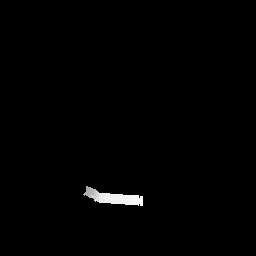

170
171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


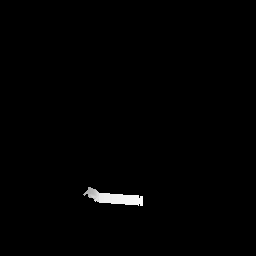

171
173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


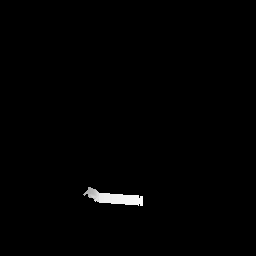

173
174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


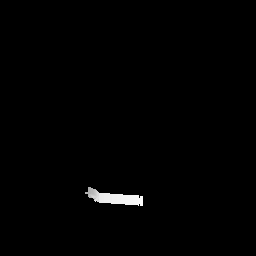

174
176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


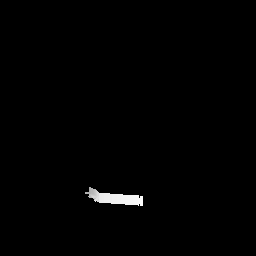

176
177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


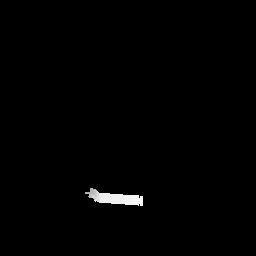

177
179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


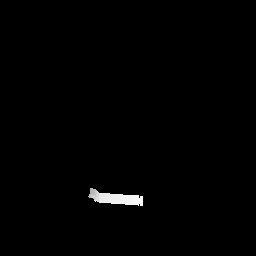

179
180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


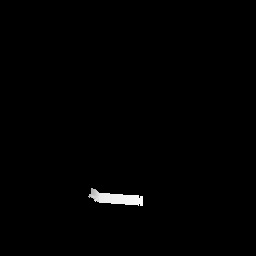

180
182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


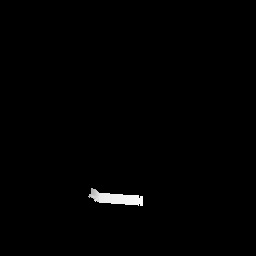

182
183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


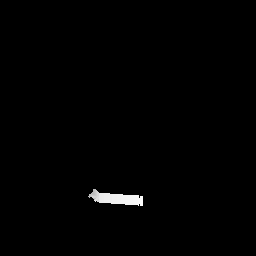

183
185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


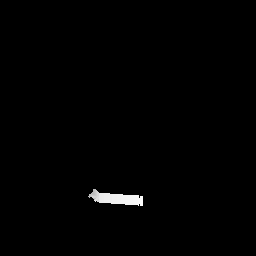

185
186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


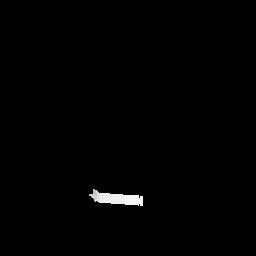

186
188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


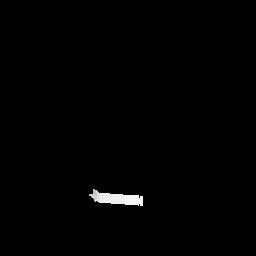

188
189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


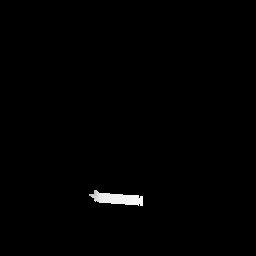

189
191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


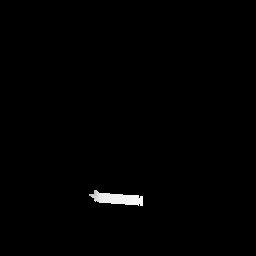

191
192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


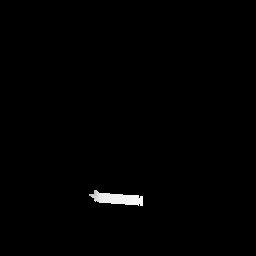

192
194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


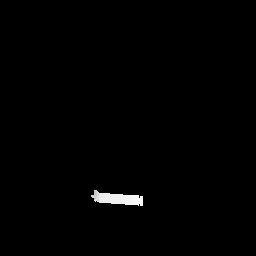

194
195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


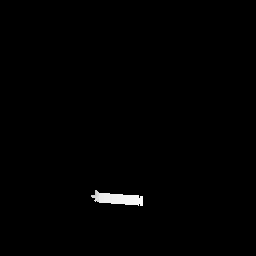

195
197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


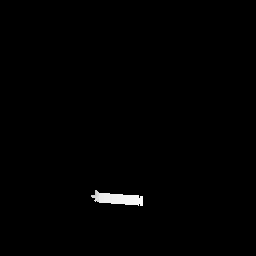

197
198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


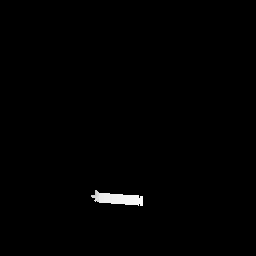

198
200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


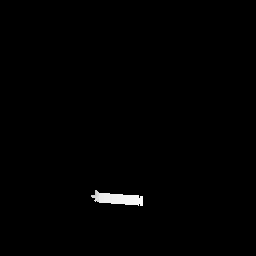

200
201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


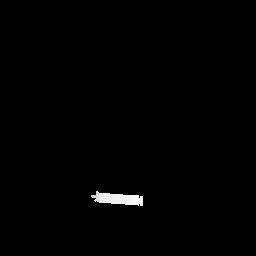

201
203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


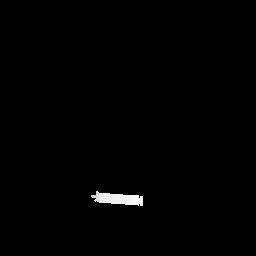

203
204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


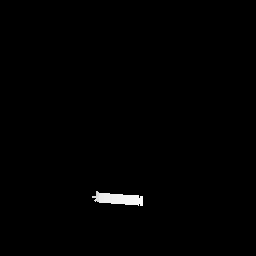

204
206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


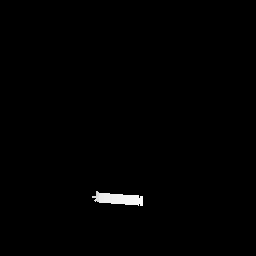

206
207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


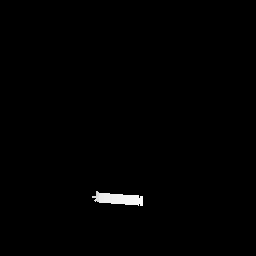

207
209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


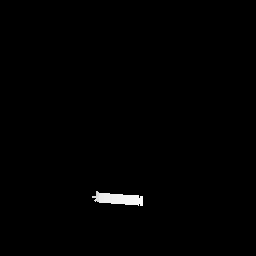

209
210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


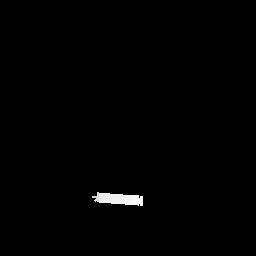

210
212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


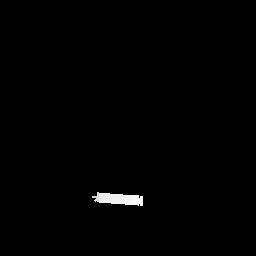

212
213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


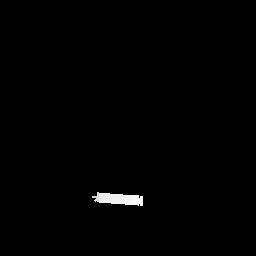

213
214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


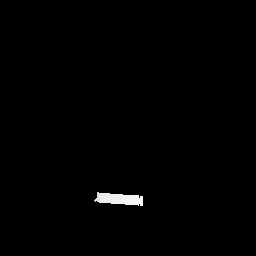

214
216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


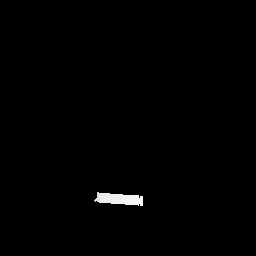

216
217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


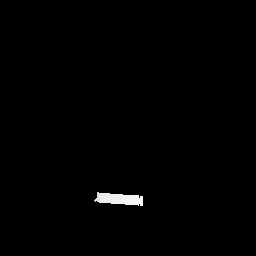

217
219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


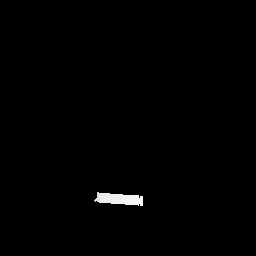

219
220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


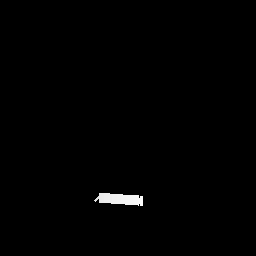

220
222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


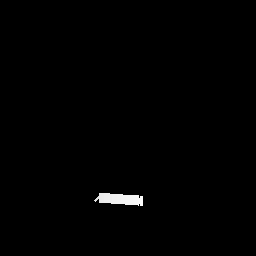

222
223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


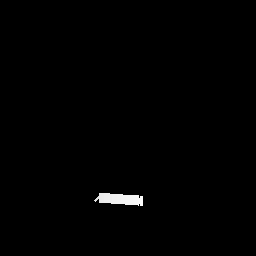

223
225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


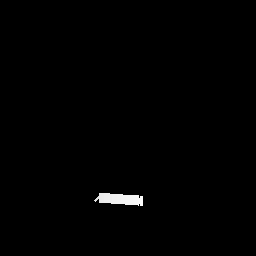

225
226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


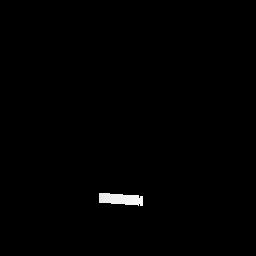

226
228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


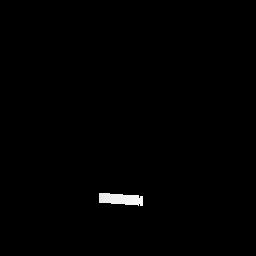

228
229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


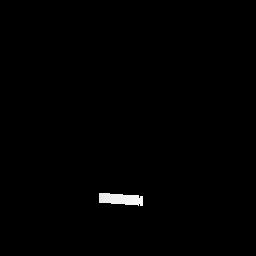

229
231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


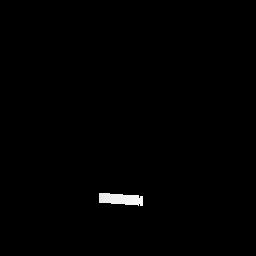

231
232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


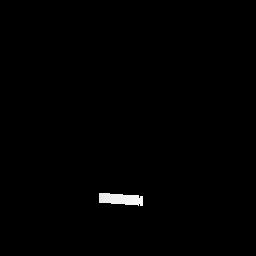

232
234
235
237
238
240
241
243
244
246
247
249
250
252
253


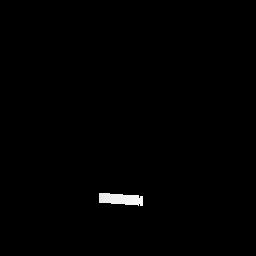

234
235
237
238
240
241
243
244
246
247
249
250
252
253


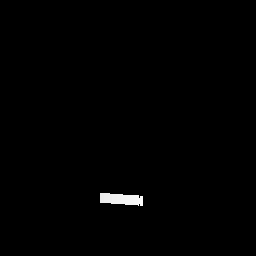

235
237
238
240
241
243
244
246
247
249
250
252
253


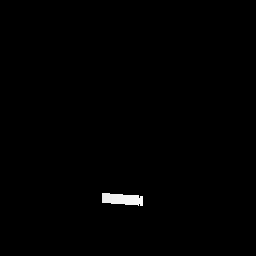

237
238
240
241
243
244
246
247
249
250
252
253


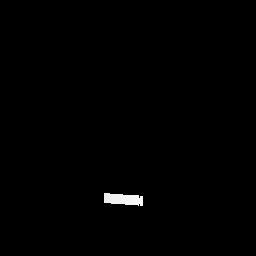

238
240
241
243
244
246
247
249
250
252
253


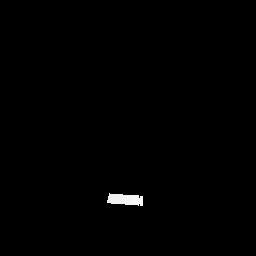

240
241
243
244
246
247
249
250
252
253


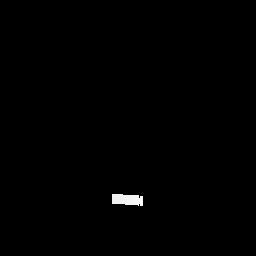

241
243
244
246
247
249
250
252
253


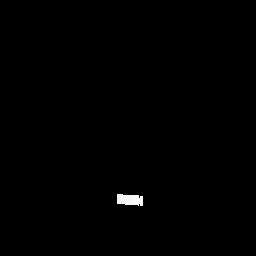

243
244
246
247
249
250
252
253


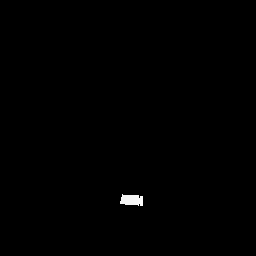

244
246
247
249
250
252
253


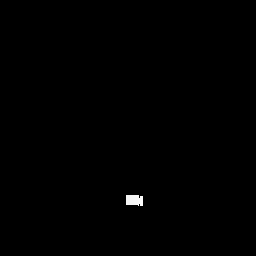

246
247
249
250
252
253


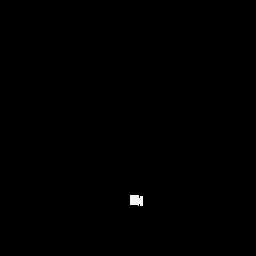

247
249
250
252
253


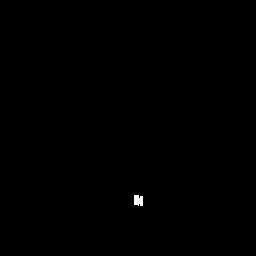

249
250
252
253


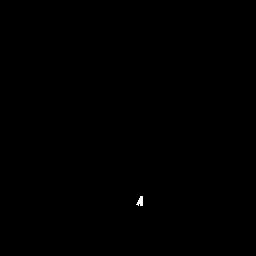

250
252
253


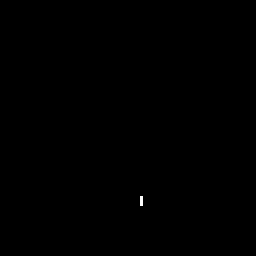

252
253


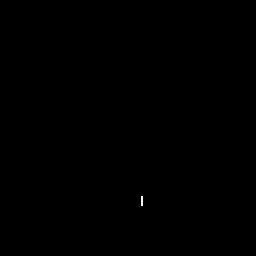

253


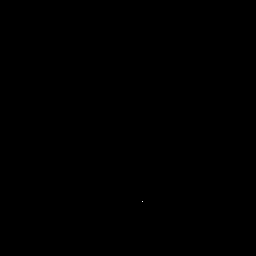

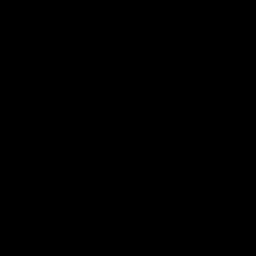

In [8]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np

dataset_root = os.path.abspath("../dataset/RLBench4/val")

for task_name in os.listdir(dataset_root):
    if 'json' in task_name:
        continue
    
    task_dir = os.path.join(dataset_root, task_name)
    for data_index in os.listdir(task_dir):
        print("task:{}  data:{}".format(task_name, data_index))
        data_dir = os.path.join(task_dir, data_index)
        base_data_dir = os.path.join(data_dir, "base_data")
        additional_dir = os.path.join(data_dir, "additional_info")
        os.makedirs(additional_dir, exist_ok=True)
        u_list, v_list = [], []
        pickle_file_list = os.listdir(base_data_dir)
        pickle_file_list.sort()
        grasp_list = []
        intensity_list = []
        
        for i, pickle_filename in enumerate(pickle_file_list):
            with open(os.path.join(base_data_dir, pickle_filename), 'rb') as f:
                pickle_data = pickle.load(f)
                intrinsic_matrix = pickle_data['front_intrinsic_matrix']
                extrinsic_matrix = pickle_data['front_extrinsic_matrix']
                camera2world_matrix = np.linalg.inv(extrinsic_matrix)

                pose = np.append(pickle_data['gripper_pose'][:3], 1)
                pose = np.array(np.dot(camera2world_matrix, pose))
                pose = pose / pose[2]
                uv = np.dot(intrinsic_matrix, pose[:3])
                u_list.append(uv[0])
                v_list.append(uv[1])
                
                intensity = int(255 * ((i + 1) / len(pickle_file_list)))
                intensity_list.append(intensity)
            
        for i, pickle_filename in enumerate(pickle_file_list):
            head, ext = os.path.splitext(pickle_filename)
            pos_img = Image.new('L',(256,256))
            d = ImageDraw.Draw(pos_img)
            
            for j in range(len(u_list[i:]) - 1):
                u = int(u_list[i + j])
                v = int(v_list[i + j])
                           
                intensity = intensity_list[i+j]
                print(intensity)
                d.line([(int(u_list[i + j + 1]), int(v_list[i + j + 1])), (int(u_list[i + j]), int(v_list[i + j]))], fill=(intensity), width=10)
            
            display(pos_img)
        break
    break
            
#             img_path = os.path.join(additional_dir, 'goal_trajectory_{}.png'.format(head))
#             pos_img.save(img_path)
    

In [11]:
pickle_data

{'front_extrinsic_matrix': array([[ 1.19209290e-07, -4.22617942e-01, -9.06307936e-01,
          1.64999914e+00],
        [-1.00000000e+00, -5.96046448e-07,  1.49011612e-07,
          3.71546562e-08],
        [-5.66244125e-07,  9.06307936e-01, -4.22617912e-01,
          1.87999928e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00]]),
 'front_intrinsic_matrix': array([[-351.6771208,    0.       ,  128.       ],
        [   0.       , -351.6771208,  128.       ],
        [   0.       ,    0.       ,    1.       ]]),
 'left_shoulder_extrinsic_matrix': array([[ 1.        ,  0.        ,  0.        ,  0.32500029],
        [ 0.        , -0.54030228, -0.84147108,  1.54999971],
        [ 0.        ,  0.84147108, -0.54030228,  1.97999907],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'left_shoulder_intrinsic_matrix': array([[-351.6771208,    0.       ,  128.       ],
        [   0.       , -351.6771208,  128.       ],
        [   0.    

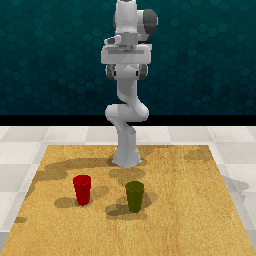

In [16]:
img = Image.open("../dataset/RLBench3/train/PickUpCup/00001/image/front_rgb_00000000.png")
pos_img = Image.new('L',(256,256))
d = ImageDraw.Draw(img)

img

In [17]:
u_list

[125.97442211529977,
 125.95276399647749,
 125.89217853447231,
 125.7783846653128,
 125.61227746936595,
 125.38554117754082,
 125.11636349399645,
 124.78395565030361,
 124.42621462355831,
 124.04058457933839,
 123.62770912139348,
 123.19379247349522,
 122.73218965960712,
 122.25067520662286,
 121.75840558666508,
 121.2475801094261,
 120.7024979909733,
 120.12988343521641,
 119.54062638497135,
 118.93595872233996,
 118.30742411605569,
 117.66636865239828,
 117.01231116253808,
 116.33660718546159,
 115.64619473009586,
 114.9440604451089,
 114.23138166286928,
 113.50852652089712,
 112.76862102373676,
 112.01450485925355,
 111.25376515257548,
 110.48402284198197,
 109.70289635105034,
 108.91600328087469,
 108.127078562258,
 107.32540769429082,
 106.51878518547892,
 105.71220940352535,
 104.90236350708406,
 104.08256483231055,
 103.27214052801538,
 102.45403201709647,
 101.6362153910336,
 100.81732402963037,
 100.00979607709021,
 99.2000642509584,
 98.40007594906321,
 97.60413325573587,
 96

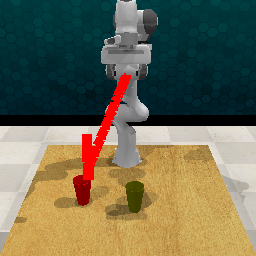

In [18]:
d.line([(int(u), int(v)) for u, v in zip(u_list,v_list)], fill=(255), width=10) 
img

In [7]:
pickle_data.keys()

dict_keys(['front_extrinsic_matrix', 'front_intrinsic_matrix', 'left_shoulder_extrinsic_matrix', 'left_shoulder_intrinsic_matrix', 'right_shoulder_extrinsic_matrix', 'right_shoulder_intrinsic_matrix', 'wrist_extrinsic_matrix', 'wrist_intrinsic_matrix', 'gripper_joint_positions', 'gripper_matrix', 'gripper_open', 'gripper_pose', 'gripper_touch_forces', 'joint_forces', 'joint_positions', 'joint_velocities', 'joints', 'task_low_dim_state'])

In [9]:
pickle_data['gripper_pose'][:3]

array([0.30167332, 0.1817728 , 1.1287353 ])

In [5]:
intrinsic_matrix = pickle_data['front_intrinsic_matrix']
pos_data = np.array(pickle_data['gripper_pose'][:3]) # x,y,z
pos_data = pos_data / pos_data[2] # u,v,1
uv_result = np.dot(intrinsic_matrix, pos_data)

In [6]:
uv_result[:2]

array([ 79.85652931, 137.46738132])

---


In [1]:
def train_val_split(root_dir, num_val, num_test=0, seed=1):
    # num_val -> validation data for each class
    train_list = []
    val_list = []
    test_list = []

    for actionname in os.listdir(root_dir):
        folder_list = []
        if actionname in ['else', 'templete']:
            continue
        elif os.path.isfile(os.path.join(root_dir, actionname)):
            continue
        
        for foldername in os.listdir(os.path.join(root_dir, actionname)):
            folder_list.append(os.path.join(root_dir, actionname, foldername))
    
        random.seed(seed)
        val_sample = random.sample(folder_list, num_val)
    
        for i in val_sample:
            folder_list.remove(i)

        if num_test > 0:
            test_sample = random.sample(folder_list, num_test)

            for i in test_sample:
                folder_list.remove(i)
            
            test_list.extend(test_sample)

        train_list.extend(folder_list)
        val_list.extend(val_sample)
    
    train_list.sort()
    val_list.sort()
    test_list.sort()

    return train_list, val_list, test_list

In [2]:
def add_data(self, folder_list):
        # for data preparation
        self.data_dict = {}
        self.data_dict['index_list'] = []
        self.data_dict['action_list'] = []
        self.data_dict['sequence'] = []
        self.data_dict['sequence_index2action'] = []
        image_index = 0
        
        for folder_path in folder_list:
            start_index = image_index
            data_folder_path = os.path.abspath(os.path.join(folder_path,'output'))
            json_path = os.path.abspath(os.path.join(folder_path,'calibration_data','realsensecalib_result.json'))

            csv_list = os.listdir(data_folder_path)
            if len(csv_list) == 4:
                for i in csv_list:
                    if 'calib_pos_' in i:
                        csv_file_name = i
            else:
                csv_file_name = 'calib_pos.csv'
                
            csv_path = os.path.join(data_folder_path,csv_file_name)
            
            df1 = pd.read_csv(csv_path)

            df = df1.loc[:,:'Opti_time']
            for i in self.target_key:
                df2 = df1.loc[:,i]
                df = pd.concat([df,df2],axis=1)

            self.label_list = list(df)
            csv_data_list = df.values.tolist()

            image_name_list = df.loc[:,self.label_list[0]].values.tolist()
            
            hand_data_list = df.loc[:,'hand:1':'hand:15.2'].values.tolist()
            center_check = True
            for i in range(len(image_name_list)):
                if self.skip_until_move:
                    if i == 0:
                        hand_center = self.hand_centor(hand_data_list[i])
                        continue
                    elif center_check:
                        new_hand_center = self.hand_centor(hand_data_list[i])
                        diff = np.sum(np.abs(new_hand_center - hand_center)) / 3
                        hand_center = new_hand_center

                    if diff <= 0.001:
                        continue
                    else:
                        center_check = False

                _, decimal = "{0:.5f}".format(image_name_list[i]).split('.')
                integer, _ = str(image_name_list[i]).split('.')
                integer = integer.zfill(5)
                image_name = "{}.{}.png".format(integer, decimal)
                rgb_image_path = os.path.join(data_folder_path,'RGB',image_name)
                depth_image_path = os.path.join(data_folder_path,'DEPTH',image_name)
                posture = csv_data_list[i]
                action = self.get_action(rgb_image_path)
                if action not in self.data_dict['action_list']:
                    self.data_dict['action_list'].append(action)
                    
                self.data_dict[str(image_index)] = {}
                self.data_dict[str(image_index)]['pose'] = posture
                self.data_dict[str(image_index)]['rgb_image_path'] = rgb_image_path
                self.data_dict[str(image_index)]['depth_image_path'] = depth_image_path
                self.data_dict[str(image_index)]['camera_info'] = self.load_json(json_path)
                self.data_dict[str(image_index)]['action'] = action

                image_index += 1

            for i in range(start_index, image_index - self.pred_len):
                self.data_dict[str(i)]['start_index'] = start_index
                self.data_dict[str(i)]['end_index'] = image_index - 1
                self.data_dict['index_list'].append(i)

            self.data_dict['sequence'].append([start_index, image_index - 1])
            self.data_dict['sequence_index2action'].append(action)

In [3]:
def split_posdata(pos_data):
    # to split all of position data into each position data
    assert len(pos_data) % 3 == 0, 'dimension of position data is wrong'
    iteration = int(len(pos_data) / 3)
    output_list = []
    for i in range(iteration):
        output_list.append(pos_data[3*i:3*(i+1)])

    return output_list
    
def get_center(pos):
    pos_list = split_posdata(pos)
    center_pos = np.zeros(3)
    nan_count = 0
    for i in pos_list:
        i = np.array(i)
        if sum(np.isnan(i)):
            nan_count += 1
            continue
        center_pos = center_pos + np.array(i)
    center_pos = center_pos / (len(pos_list) - nan_count)
    return center_pos

def add_serial_data(main_data, targetname, start, end, marker=True, semicolon=True):
    if start == 0:
        raise ValueError("start num >= 1")

    for i in range(start, end + 1):
        for j in ["",".1",".2"]:
            if marker:
                main_data.append("{}:Marker{}{}".format(targetname,i,j))
            elif semicolon:
                main_data.append("{}:{}{}".format(targetname,i,j))
            else:
                main_data.append("{}{}{}".format(targetname,i,j))
    return main_data

def load_json(json_path):
    # load json data
    with open(json_path) as f:
        data = f.read()
    data = json.loads(data)
    return data

def transform_pos2image(pos, json_data, image_size):
        uv = get_uv(pos, json_data['dist'], json_data['mtx'])
        pos_image = self.make_pos_image(image_size,uv)
        if self.ToTensor != None:
            pos_image = self.ToTensor(pos_image)
        uv = torch.tensor(uv)[:,:2]
        uv_mask = torch.where(torch.isnan(uv), 0., 1.)
        uv = torch.where(torch.isnan(uv), 0., uv)
        return pos_image, uv, uv_mask

def modify_distortion(vec,dist_vec):
        # modify distortion
        x,y,_ = vec
        r2 = (x*x) + (y*y)
        r4 = r2*r2
        r6 = r4*r2
        dist = dist_vec[0]
        mod_x = x*(1+(dist[0]*r2)+(dist[1]*r4)+(dist[4]*r6)) + 2*dist[2]*x*y + dist[3]*(r2+(2*x*x))
        mod_y = y*(1+(dist[0]*r2)+(dist[1]*r4)+(dist[4]*r6)) + 2*dist[3]*x*y + dist[2]*(r2+(2*y*y))
        ### TODO confirm this effect ###
        return [x,y,1]

def get_uv(pos_data, dist_vec, intrinsic_matrix):
    # transfer position data(based on motive coordinate) to camera coordinate
    split = split_posdata(pos_data)
    uv_result_list = []
    for ins in split:
        ins = np.array(ins)
        ins = ins / ins[2]
        mod_ins = modify_distortion(ins,dist_vec)
        uv_result = np.dot(intrinsic_matrix,mod_ins)
        uv_result_list.append(uv_result)
    return uv_result_list

In [30]:
import os
import pickle
from PIL import Image, ImageDraw
import numpy as np
import pandas as pd
import json
import shutil

root_dir = os.path.abspath('../dataset/HMD')
folder_list = []

for actionname in os.listdir(root_dir):
    if actionname in ['else', 'templete']:
        continue
    elif os.path.isfile(os.path.join(root_dir, actionname)):
        continue
        
    for foldername in os.listdir(os.path.join(root_dir, actionname)):
        folder_list.append([os.path.join(root_dir, actionname, foldername), actionname])

In [31]:
data_dict = {}
image_index = 0
target_key = add_serial_data([], "hand", 1, 15, False, True)
target_key = add_serial_data(target_key, "knife", 1 ,6, True)
print(target_key)

for folder_path, action in folder_list:
    print(folder_path)
    start_index = image_index
    data_folder_path = os.path.abspath(os.path.join(folder_path,'output'))
    json_path = os.path.abspath(os.path.join(folder_path,'calibration_data','realsensecalib_result.json'))
    json_data = load_json(json_path)
    
    list_of_folder = os.listdir(data_folder_path)
    for i in list_of_folder:
        print(i)
        if 'calib_pos_' in i:
            csv_file_name = i
            break
        else:
            csv_file_name = 'calib_pos.csv'

    csv_path = os.path.join(data_folder_path,csv_file_name)

    df1 = pd.read_csv(csv_path)

    df = df1.loc[:,:'Opti_time']
    for i in target_key:
        df2 = df1.loc[:,i]
        df = pd.concat([df,df2],axis=1)

    label_list = list(df)
    csv_data_list = df.values.tolist()

    image_name_list = df.loc[:,label_list[0]].values.tolist()

    hand_data_list = df.loc[:,'hand:1':'hand:15.2'].values.tolist()
    knife_data_list = df.loc[:,'knife:Marker1':'knife:Marker6.2'].values.tolist()
    center_check = True
    hand_center_list = []
    knife_center_list = []
    for i in range(len(image_name_list)):
        if i == 0:
            hand_center = get_center(hand_data_list[i])
            hand_center_list.append(get_uv(hand_center, json_data['dist'], json_data['mtx']))
            knife_center = get_center(knife_data_list[i])
            knife_center_list.append(get_uv(knife_center, json_data['dist'], json_data['mtx']))
            valid_index = [0]
            continue
        elif center_check:
            new_hand_center = get_center(hand_data_list[i])
            diff = np.sum(np.abs(new_hand_center - hand_center)) / 3
            hand_center = new_hand_center

        if diff <= 0.001:
            continue
        else:
            center_check = False

        if not center_check:
            valid_index.append(i)

            pos = get_center(hand_data_list[i])
            uv = get_uv(pos, json_data['dist'], json_data['mtx'])
            hand_center_list.append(uv)

            knife_pos = get_center(knife_data_list[i])
            knife_center_list.append(get_uv(knife_pos, json_data['dist'], json_data['mtx']))
    
    print(len(hand_center_list))
    
    trajectory_dir_path = os.path.join(data_folder_path,'trajectory')
    if os.path.exists(trajectory_dir_path):
        shutil.rmtree(trajectory_dir_path)
    os.makedirs(trajectory_dir_path, exist_ok=True)
    
    for i in range(len(hand_center_list)):
        image_name = image_name_list[valid_index[i]]
        _, decimal = "{0:.5f}".format(image_name).split('.')
        integer, _ = str(image_name).split('.')
        integer = integer.zfill(5)
        image_name = "{}.{}.png".format(integer, decimal)
        image_hand_name = "hand_{}.{}.png".format(integer, decimal)
        image_knife_name = "knife_{}.{}.png".format(integer, decimal)
        
        rgb_image_path = os.path.join(data_folder_path,'RGB',image_name)
        rgb_image = Image.open(rgb_image_path)
        
        trajectory_image_path = os.path.join(trajectory_dir_path, image_name)
        trajectory_hand_path = os.path.join(trajectory_dir_path, image_hand_name)
        trajectory_knife_path = os.path.join(trajectory_dir_path, image_knife_name)
        
        pos_img_hand = Image.new('L',(448,224))
        d_hand = ImageDraw.Draw(pos_img_hand)
        pos_img_knife = Image.new('L',(448,224))
        d_knife = ImageDraw.Draw(pos_img_knife)
        
        d = ImageDraw.Draw(rgb_image)
        d.line([(int(uv[0][0]), int(uv[0][1])) for uv in hand_center_list[i:]], fill=(255), width=10)
        d_hand.line([(int(uv[0][0]), int(uv[0][1])) for uv in hand_center_list[i:]], fill=(255), width=10) 
        
        if 'move' not in action:
            d.line([(int(uv[0][0]), int(uv[0][1])) for uv in knife_center_list[i:]], fill=(255,0,255), width=10) 
            d_knife.line([(int(uv[0][0]), int(uv[0][1])) for uv in knife_center_list[i:]], fill=(255), width=10)
            pos_img_knife.save(trajectory_knife_path)
        
        rgb_image.save(trajectory_image_path)
        pos_img_hand.save(trajectory_hand_path)

['hand:1', 'hand:1.1', 'hand:1.2', 'hand:2', 'hand:2.1', 'hand:2.2', 'hand:3', 'hand:3.1', 'hand:3.2', 'hand:4', 'hand:4.1', 'hand:4.2', 'hand:5', 'hand:5.1', 'hand:5.2', 'hand:6', 'hand:6.1', 'hand:6.2', 'hand:7', 'hand:7.1', 'hand:7.2', 'hand:8', 'hand:8.1', 'hand:8.2', 'hand:9', 'hand:9.1', 'hand:9.2', 'hand:10', 'hand:10.1', 'hand:10.2', 'hand:11', 'hand:11.1', 'hand:11.2', 'hand:12', 'hand:12.1', 'hand:12.2', 'hand:13', 'hand:13.1', 'hand:13.2', 'hand:14', 'hand:14.1', 'hand:14.2', 'hand:15', 'hand:15.1', 'hand:15.2', 'knife:Marker1', 'knife:Marker1.1', 'knife:Marker1.2', 'knife:Marker2', 'knife:Marker2.1', 'knife:Marker2.2', 'knife:Marker3', 'knife:Marker3.1', 'knife:Marker3.2', 'knife:Marker4', 'knife:Marker4.1', 'knife:Marker4.2', 'knife:Marker5', 'knife:Marker5.1', 'knife:Marker5.2', 'knife:Marker6', 'knife:Marker6.1', 'knife:Marker6.2']
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_carrot/202009221527
DEPTH
RGB
calib_pos.csv
trajectory
33
/misc

/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091849
DEPTH
RGB
calib_pos.csv
calib_pos_-0.0833333333333333.csv
20
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091850
DEPTH
RGB
calib_pos.csv
calib_pos_0.11666666666666668.csv
20
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091851
DEPTH
RGB
calib_pos.csv
trajectory
25
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091852
DEPTH
RGB
calib_pos.csv
trajectory
21
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091853
DEPTH
RGB
calib_pos.csv
trajectory
17
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091854
DEPTH
RGB
calib_pos.csv
trajectory
21
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_cucumber/202009091855
DEPTH
RGB
calib_pos.csv
ca

/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_eggplant/202009151930
DEPTH
RGB
calib_pos.csv
calib_pos_-0.10833333333333335.csv
43
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_eggplant/202009151932
DEPTH
RGB
calib_pos.csv
trajectory
31
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_eggplant/202009151933
DEPTH
RGB
calib_pos.csv
trajectory
36
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_eggplant/202009151934
DEPTH
RGB
calib_pos.csv
calib_pos_-0.15833333333333333.csv
30
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_eggplant/202009151935
DEPTH
RGB
calib_pos.csv
trajectory
34
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_eggplant/202009151936
DEPTH
RGB
calib_pos.csv
calib_pos_0.09166666666666666.csv
32
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/cut_sp/202009211720
DEPTH
R

/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/env/dl11/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151715
DEPTH
RGB
calib_pos.csv
48
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151716
DEPTH
RGB
calib_pos.csv
calib_pos_0.04166666666666667.csv
46
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151717
DEPTH
RGB
calib_pos.csv
52
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151719
DEPTH
RGB
calib_pos.csv
50
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151720
DEPTH
RGB
calib_pos.csv
calib_pos_0.14166666666666672.csv
34
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151721
DEPTH
RGB
calib_pos.csv
43
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_bottle/202009151723
DEPTH
RGB
calib_pos.csv
55
/misc/dl00/tendon/project/Imitation_Learning/Motio

/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020530
DEPTH
RGB
calib_pos.csv
49
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020531
DEPTH
RGB
calib_pos.csv
38
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020533
DEPTH
RGB
calib_pos.csv
47
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020535
DEPTH
RGB
calib_pos.csv
51
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020537
DEPTH
RGB
calib_pos.csv
44
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020539
DEPTH
RGB
calib_pos.csv
39
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020540
DEPTH
RGB
calib_pos.csv
37
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202008020542
DEP

/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191616
DEPTH
RGB
calib_pos.csv
33
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191617
DEPTH
RGB
calib_pos.csv
29
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191618
DEPTH
RGB
calib_pos.csv
37
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191619
DEPTH
RGB
calib_pos.csv
calib_pos_-0.20833333333333331.csv
27
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191620
DEPTH
RGB
calib_pos.csv
25
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191621
DEPTH
RGB
calib_pos.csv
calib_pos_0.0666666666666667.csv
28
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_cucumber/202009191622
DEPTH
RGB
calib_pos.csv
32
/misc/dl00/tendon/project/Imitation_

/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151840
DEPTH
RGB
calib_pos.csv
25
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151841
DEPTH
RGB
calib_pos.csv
calib_pos_0.09166666666666672.csv
27
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151844
DEPTH
RGB
calib_pos.csv
calib_pos_-0.0833333333333333.csv
29
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151845
DEPTH
RGB
calib_pos.csv
29
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151846
DEPTH
RGB
calib_pos.csv
26
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151849
DEPTH
RGB
calib_pos.csv
25
/misc/dl00/tendon/project/Imitation_Learning/MotionPrediction/dataset/HMD/move_eggplant/202009151850
DEPTH
RGB
calib_pos.csv
28
/misc/dl00/tendon/project/Imitation_

In [27]:
knife_center_list

[[array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 [array([nan, nan, nan])],
 

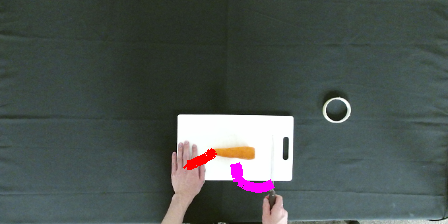

In [107]:
rgb_image

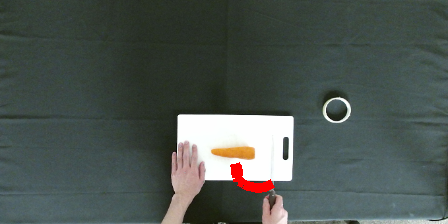

In [100]:
rgb_image_for_knife

In [70]:
hand_center_list

[[array([186.51049179, 163.55263711,   1.        ])],
 [array([187.28603447, 164.07376718,   1.        ])],
 [array([190.8307056 , 164.26427501,   1.        ])],
 [array([195.41047603, 162.62799583,   1.        ])],
 [array([199.69383843, 160.6708519 ,   1.        ])],
 [array([204.04188212, 158.68710692,   1.        ])],
 [array([207.9370981 , 156.44131122,   1.        ])],
 [array([211.72138969, 154.11760846,   1.        ])],
 [array([211.79562301, 154.11659182,   1.        ])],
 [array([211.49900343, 153.98632015,   1.        ])],
 [array([211.49867657, 153.92184987,   1.        ])],
 [array([211.45587262, 153.89737925,   1.        ])],
 [array([211.42243676, 153.92940205,   1.        ])],
 [array([211.35976561, 154.00357091,   1.        ])],
 [array([211.27368652, 154.22386636,   1.        ])],
 [array([211.25411518, 154.60116299,   1.        ])],
 [array([211.27904491, 154.70909718,   1.        ])],
 [array([211.24682946, 154.6193333 ,   1.        ])],
 [array([211.18666964, 154.4